# EDA

Main tasks:<br>
arr flight(SQ234) -> mct = 1hr/60mins<br>
    dep SQ1 HK   -> 1hr<br>
    dep SQ2 SA   -> 1.5hr<br>
    dep SQ3 AUS  -> 2hr<br>
SQ234: 10 ULD /35bags<br>
   ULD1 : mahwish(200$), yousra(70$) = PRIO<br>
   ULD2 : shaheer = non-prio<br>
Flgiths<br>
connection flights<br>
ULD details<br>
bag details<br>
goal:<br>
1- identify day with most success and unsuccessful handling of bags
2. compare the day of the week with the success and unsuccessfull day
3. tally the dates goven by mathew<br>
to-do:<br>
SQ BCMT<br>
1. filter only red highlihted records
2. extract SIN flght no, SIN datestamp, origin, dest<br>
SQ Hub sheet:<br>
1. combine 1-15th sep + 16+30sep
2. convert it to format (clean_combine_data_no_dublicate)<br>
   result: inbound flight no, inbound date, outbound flight no, outbound date
3. merge SQ SMT, clean combine data
4. filter connection_time <= 90
5. tally how many records? ~400
6. group by  SIN datestamp
7. worst day with max count, best day with min count
8. tally dates given by matthew
9. create a df of that day of the week.

## Task 3 combine 1-15th sep + 16+30sep

In [2]:
#  read the excel files :
import pandas as pd
import numpy as np
import os
os.chdir(r"F:/Neural_Lab/SATS-DA")

# data1_15=pd.read_csv(r"F:/Neural_Lab/SATS-DA\st1")


In [3]:
os.getcwd()


'F:\\Neural_Lab\\SATS-DA'

In [4]:
# st1 is data 1-15 and st2 is data 16-30, Name changed to avoid lengthy file names
data1_15=pd.read_csv('F:/Neural_Lab/SATS-DA/st1.csv')
data2_15=pd.read_csv('F:/Neural_Lab/SATS-DA/st2.csv')

In [5]:
data1_15.head()
len(data1_15)

563559

In [6]:
data2_15.head()
len(data2_15)

566933

In [7]:
#  combine the two data sets
data1_30=pd.concat([data1_15,data2_15],axis=0)

In [8]:
len(data1_30)

1130492

In [9]:
#  columns in the data set:
data1_30.columns

Index(['Date', 'Bag Tag Number', 'Inbound Flight Number', 'ULD', 'Status',
       'Type', 'TFR', 'Connection Time', 'Outbound Flight Number', 'ULD.1',
       'Status.1', 'Type.1'],
      dtype='object')

In [10]:
#  Extract Inbound Date and flight number from Inbound Flight Number column and Outbound Date and flight number from Outbound Flight Number column
data1_30['Inbound Date'] = data1_30['Inbound Flight Number'].apply(lambda x: x.split(" ")[0].split("/")[1] if len(x.split(" ")) > 1 and len(x.split("/")) > 1 else None)
data1_30['Outbound Date'] = data1_30['Outbound Flight Number'].apply(lambda x: x.split(" ")[0].split("/")[1] if len(x.split(" ")) > 1 and len(x.split("/")) > 1 else None)
data1_30['Inbound FNO']=data1_30['Inbound Flight Number'].apply(lambda x: x.split(" ")[0].split("/")[0] if len(x.split(" ")) > 1 and len(x.split("/")) > 1 else None)
data1_30['Outbound FNO']=data1_30['Outbound Flight Number'].apply(lambda x: x.split(" ")[0].split("/")[0] if len(x.split(" ")) > 1 and len(x.split("/")) > 1 else None)


In [11]:
data1_30.head()


,Date,Bag Tag Number,Inbound Flight Number,ULD,Status,Type,TFR,Connection Time,Outbound Flight Number,ULD.1,Status.1,Type.1,Inbound Date,Outbound Date,Inbound FNO,Outbound FNO
0,1-Sep-23,618243907,SQ495/31AUG DXB,AKE14165SQ,Located At Airport,-,SIN,-,TR286/01SEP DPS,AKE70705SQ,Located At Airport,-,31AUG,01SEP,SQ495,TR286
1,NaN,618263825,-,-,-,-,SIN,-,SQ217/01SEP MEL,AKE28138SQ,Aircraft,CREW,None,01SEP,None,SQ217
2,NaN,618286755,-,-,-,-,SIN,-,SQ221/01SEP SYD,AKE28148SQ,Aircraft,CREW,None,01SEP,None,SQ221
3,NaN,618227557,SQ208/31AUG MEL,AKE70165SQ,Located At Airport,-,SIN,275,SQ392/01SEP IST,AKE13299SQ,Aircraft,-,31AUG,01SEP,SQ208,SQ392
4,NaN,618227588,SQ208/31AUG MEL,AKE70165SQ,Located At Airport,-,SIN,275,SQ392/01SEP IST,AKE13299SQ,Aircraft,-,31AUG,01SEP,SQ208,SQ392


In [169]:
#  save data1_30:
data1_30.to_csv('F:/Neural_Lab/SATS-DA/data1_30.csv')

Uptill here the info of passengers is being separated by extracting Flight No and Date both for inbound and outbound

## read the data of SQ-BCMT-01 - 30


This file contains the info of bags and ULDs and their status 

In [12]:
import pandas as pd
df_BCMT=pd.read_excel(r'F:/Neural_Lab/SATS-DA/SQBCM.xlsx')

In [13]:
len(df_BCMT)

542

In [14]:
#  columns in the data set:
df_BCMT.columns

Index(['Rec Type PIR', 'WT Last Name', 'Tag Number', 'Routing (RT)',
       'Passenger Itinerary (FD)', 'Reason of Rejection',
       'Worldtracer Fault Station', 'RL Code', 'Actual Connecting Time',
       'Demerit Points', 'Status', 'WTR CREATE DATE FORMAT',
       'Name Last Modified', 'BCMT Fault Station: BCMT Station Name',
       'Incident'],
      dtype='object')

In [15]:
df_BCMT.head(5)


,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,Status,WTR CREATE DATE FORMAT,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident
0,HKGSQ37525,TAM,1 / SQ / 232450,SIN/HKG,SQ9894/01Sep2023,STD 0615 X REBOOKED FROM SQ892 STD 0940,SS X NOT RETAGGED,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading
1,PNHSQ14769,LIYANGE,1 / SQ / 256860,SIN/PNH,SQ154/01Sep2023,STD 0740 X CT70A290@0546 X RT12@0547 X FWDD BY...,LOADING ERROR,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading
2,BKKSQ39975,YU,1 / SQ / 282769,SIN/BKK,SQ714/01Sep2023,STD 1730 X CT70A290@1550,NO AUTHORITY/BUM X BSM RECEIVED@1634 BUT NOT S...,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading
3,BKKSQ39976,DANGKRAJANG,1 / SQ / 282733,SIN/BKK,SQ714/01Sep2023,STD 1730 X CT90A280@1548,NO AUTHORITY/BUM X BSM RECEIVED@1633 BUT NOT S...,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading
4,SINSQ66729,ALEXANDER,1 / SQ / 297349,COK/SIN,SQ535/01Sep2023,NaN,LOCATED LATER,42.0,NaN,1.0,NaN,2023-09-01 00:00:00,Data Loader,SIN,1d. Arrival Mhldg


In [16]:
#  Routing (RT), Passenger Itinerary (FD):
df_BCMT[['Routing (RT)','Passenger Itinerary (FD)']]

,Routing (RT),Passenger Itinerary (FD)
0,SIN/HKG,SQ9894/01Sep2023
1,SIN/PNH,SQ154/01Sep2023
2,SIN/BKK,SQ714/01Sep2023
3,SIN/BKK,SQ714/01Sep2023
4,COK/SIN,SQ535/01Sep2023
...,...,...
537,MNL/SIN,SQ919/30Sep2023
538,HKG/SIN,SQ893/30Sep2023
539,MNL/SIN,SQ921/30Sep2023
540,MEL/SIN,SQ208/30Sep2023


In [115]:
#  In the Routing (RT) column, how many cells have 3 '/' in it:
df_BCMT['Routing (RT)'].str.count('/').value_counts()

Routing (RT)
2    404
1     96
3     32
4     10
Name: count, dtype: int64

In [116]:
#  convert the Routing (RT) column to a list and replace the '/' with a ',':
# convert the Routing (RT) column to a list and replace the '/' with a ',':
df_BCMT['Routing (RT)']=df_BCMT['Routing (RT)'].str.split("/")




In [117]:
df_BCMT.head()

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,Status,WTR CREATE DATE FORMAT,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident
0,HKGSQ37525,TAM,1 / SQ / 232450,"[SIN, HKG]",SQ9894/01Sep2023,STD 0615 X REBOOKED FROM SQ892 STD 0940,SS X NOT RETAGGED,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading
1,PNHSQ14769,LIYANGE,1 / SQ / 256860,"[SIN, PNH]",SQ154/01Sep2023,STD 0740 X CT70A290@0546 X RT12@0547 X FWDD BY...,LOADING ERROR,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading
2,BKKSQ39975,YU,1 / SQ / 282769,"[SIN, BKK]",SQ714/01Sep2023,STD 1730 X CT70A290@1550,NO AUTHORITY/BUM X BSM RECEIVED@1634 BUT NOT S...,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading
3,BKKSQ39976,DANGKRAJANG,1 / SQ / 282733,"[SIN, BKK]",SQ714/01Sep2023,STD 1730 X CT90A280@1548,NO AUTHORITY/BUM X BSM RECEIVED@1633 BUT NOT S...,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading
4,SINSQ66729,ALEXANDER,1 / SQ / 297349,"[COK, SIN]",SQ535/01Sep2023,NaN,LOCATED LATER,42.0,NaN,1.0,NaN,2023-09-01 00:00:00,Data Loader,SIN,1d. Arrival Mhldg


In [17]:
#  which wlemnt of the list is SIN:
df_BCMT['SIN-Index']=df_BCMT['Routing (RT)'].apply(lambda x: x.index('SIN') if 'SIN' in x else None)

In [120]:
df_BCMT.head()

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,Status,WTR CREATE DATE FORMAT,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident,SIN-Index
0,HKGSQ37525,TAM,1 / SQ / 232450,"[SIN, HKG]",SQ9894/01Sep2023,STD 0615 X REBOOKED FROM SQ892 STD 0940,SS X NOT RETAGGED,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0
1,PNHSQ14769,LIYANGE,1 / SQ / 256860,"[SIN, PNH]",SQ154/01Sep2023,STD 0740 X CT70A290@0546 X RT12@0547 X FWDD BY...,LOADING ERROR,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0
2,BKKSQ39975,YU,1 / SQ / 282769,"[SIN, BKK]",SQ714/01Sep2023,STD 1730 X CT70A290@1550,NO AUTHORITY/BUM X BSM RECEIVED@1634 BUT NOT S...,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0
3,BKKSQ39976,DANGKRAJANG,1 / SQ / 282733,"[SIN, BKK]",SQ714/01Sep2023,STD 1730 X CT90A280@1548,NO AUTHORITY/BUM X BSM RECEIVED@1633 BUT NOT S...,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0
4,SINSQ66729,ALEXANDER,1 / SQ / 297349,"[COK, SIN]",SQ535/01Sep2023,NaN,LOCATED LATER,42.0,NaN,1.0,NaN,2023-09-01 00:00:00,Data Loader,SIN,1d. Arrival Mhldg,1


In [108]:
#  find the element number of 'SIN' in the Routing (RT) column and place the number in a new column 'SIN:
df_BCMT['SIN_index']=df_BCMT['Routing (RT)'].str.find('SIN')


In [18]:
df_BCMT.head()

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,Status,WTR CREATE DATE FORMAT,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident,SIN-Index
0,HKGSQ37525,TAM,1 / SQ / 232450,SIN/HKG,SQ9894/01Sep2023,STD 0615 X REBOOKED FROM SQ892 STD 0940,SS X NOT RETAGGED,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0
1,PNHSQ14769,LIYANGE,1 / SQ / 256860,SIN/PNH,SQ154/01Sep2023,STD 0740 X CT70A290@0546 X RT12@0547 X FWDD BY...,LOADING ERROR,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0
2,BKKSQ39975,YU,1 / SQ / 282769,SIN/BKK,SQ714/01Sep2023,STD 1730 X CT70A290@1550,NO AUTHORITY/BUM X BSM RECEIVED@1634 BUT NOT S...,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0
3,BKKSQ39976,DANGKRAJANG,1 / SQ / 282733,SIN/BKK,SQ714/01Sep2023,STD 1730 X CT90A280@1548,NO AUTHORITY/BUM X BSM RECEIVED@1633 BUT NOT S...,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0
4,SINSQ66729,ALEXANDER,1 / SQ / 297349,COK/SIN,SQ535/01Sep2023,NaN,LOCATED LATER,42.0,NaN,1.0,NaN,2023-09-01 00:00:00,Data Loader,SIN,1d. Arrival Mhldg,4


<Axes: xlabel='Routing (RT)'>

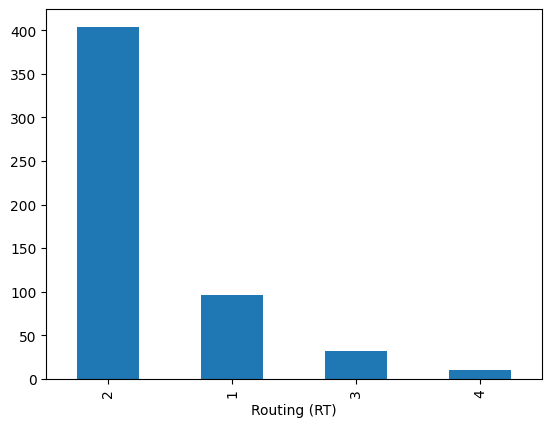

In [19]:
df_BCMT['Routing (RT)'].str.count('/').value_counts().plot(kind='bar')

In [20]:
#  convert the pessenger Iterinary (FD) column to a list and replace the ' ' with a ',':
df_BCMT['Passenger Itinerary (FD)']=df_BCMT['Passenger Itinerary (FD)'].str.split(" ")

In [21]:
df_BCMT.head()

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,Status,WTR CREATE DATE FORMAT,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident,SIN-Index
0,HKGSQ37525,TAM,1 / SQ / 232450,SIN/HKG,[SQ9894/01Sep2023],STD 0615 X REBOOKED FROM SQ892 STD 0940,SS X NOT RETAGGED,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0
1,PNHSQ14769,LIYANGE,1 / SQ / 256860,SIN/PNH,[SQ154/01Sep2023],STD 0740 X CT70A290@0546 X RT12@0547 X FWDD BY...,LOADING ERROR,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0
2,BKKSQ39975,YU,1 / SQ / 282769,SIN/BKK,[SQ714/01Sep2023],STD 1730 X CT70A290@1550,NO AUTHORITY/BUM X BSM RECEIVED@1634 BUT NOT S...,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0
3,BKKSQ39976,DANGKRAJANG,1 / SQ / 282733,SIN/BKK,[SQ714/01Sep2023],STD 1730 X CT90A280@1548,NO AUTHORITY/BUM X BSM RECEIVED@1633 BUT NOT S...,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0
4,SINSQ66729,ALEXANDER,1 / SQ / 297349,COK/SIN,[SQ535/01Sep2023],NaN,LOCATED LATER,42.0,NaN,1.0,NaN,2023-09-01 00:00:00,Data Loader,SIN,1d. Arrival Mhldg,4


In [124]:
# save df_BCMT to a csv file:
df_BCMT.to_csv('F:/Neural_Lab/SATS-DA/df_BCMTshort.csv')

In [132]:
import numpy as np

# Check the data type of the 'Passenger Itinerary (FD)' column.
passenger_itinerary_dtype = df_BCMT["Passenger Itinerary (FD)"].dtype

# Convert the 'Passenger Itinerary (FD)' column to a string if necessary.
if passenger_itinerary_dtype != "object":
    df_BCMT["Passenger Itinerary (FD)"] = df_BCMT["Passenger Itinerary (FD)"].astype("str")

# Get the value in the SIN-index column.
sin_index_value = df_BCMT["SIN-Index"]

# Get the element in the passenger Iterinary (FD) column matching the SIN-index.
passenger_itinerary_element_matching_sin_index = df_BCMT["Passenger Itinerary (FD)"].str.split(",").str[sin_index_value.index]

# Print the result.
print(passenger_itinerary_element_matching_sin_index)

AttributeError: Can only use .str accessor with string values!

In [133]:
# Check the data type of the 'Passenger Itinerary (FD)' column.
passenger_itinerary_dtype = df_BCMT["Passenger Itinerary (FD)"].dtype

# Print the data type.
print(passenger_itinerary_dtype)


object


In [148]:
import numpy as np

# Check the data type of the 'Passenger Itinerary (FD)' column.
passenger_itinerary_dtype = df_BCMT["Passenger Itinerary (FD)"].dtype

# Convert the 'Passenger Itinerary (FD)' column to a string if necessary.
if passenger_itinerary_dtype != "object":
    df_BCMT["Passenger Itinerary (FD)"] = df_BCMT["Passenger Itinerary (FD)"].astype("str")

# Get the value in the SIN-index column.
sin_index_value = df_BCMT["SIN-Index"]


# # Get the element in the passenger Iterinary (FD) column matching the SIN-index,
# # handling None, NaN, and lists.
def get_passenger_itinerary_element_matching_sin_index(row):
    x = row["Passenger Itinerary (FD)"]
    y=row["SIN-Index"]
    if len(x)>y:
        return(x[y])
    else:
        return(x[y-1])
    # if x is not None and not pd.isna(x):
    #     if isinstance(x, list):
    # print(x[sin_index_value])
    #     else:
    # #         return x.split(",")[sin_index_value]
    # else:
    #     return None

df_BCMT['C'] = df_BCMT.apply(get_passenger_itinerary_element_matching_sin_index, axis=1)

# # Print the result.
# print(passenger_itinerary_element_matching_sin_index)

In [151]:
# columns in the dc_BCMT data set:
df_BCMT.columns

Index(['Rec Type PIR', 'WT Last Name', 'Tag Number', 'Routing (RT)',
       'Passenger Itinerary (FD)', 'Reason of Rejection',
       'Worldtracer Fault Station', 'RL Code', 'Actual Connecting Time',
       'Demerit Points', 'Status', 'WTR CREATE DATE FORMAT',
       'Name Last Modified', 'BCMT Fault Station: BCMT Station Name',
       'Incident', 'SIN-Index', 'C'],
      dtype='object')

In [154]:
df_BCMT[['Routing (RT)','Passenger Itinerary (FD)','SIN-Index','C']].tail()

,Routing (RT),Passenger Itinerary (FD),SIN-Index,C
537,"[MNL, SIN]",[SQ919/30Sep2023],1,SQ919/30Sep2023
538,"[HKG, SIN]",[SQ893/30Sep2023],1,SQ893/30Sep2023
539,"[MNL, SIN]",[SQ921/30Sep2023],1,SQ921/30Sep2023
540,"[MEL, SIN]",[SQ208/30Sep2023],1,SQ208/30Sep2023
541,"[HND, KIX, SIN]","[NH97/30Sep2023, SQ623/30Sep2023]",2,SQ623/30Sep2023


In [158]:
#  convert column C to a list:
df_BCMT['C']=df_BCMT['C'].str.split("/")



In [161]:
# take the first element of the list:
df_BCMT['C1']=df_BCMT['C'].apply(lambda x: x[0])

In [163]:
df_BCMT.head()

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,Status,WTR CREATE DATE FORMAT,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident,SIN-Index,C,C1
0,HKGSQ37525,TAM,1 / SQ / 232450,"[SIN, HKG]",[SQ9894/01Sep2023],STD 0615 X REBOOKED FROM SQ892 STD 0940,SS X NOT RETAGGED,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"[SQ9894, 01Sep2023]",SQ9894
1,PNHSQ14769,LIYANGE,1 / SQ / 256860,"[SIN, PNH]",[SQ154/01Sep2023],STD 0740 X CT70A290@0546 X RT12@0547 X FWDD BY...,LOADING ERROR,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"[SQ154, 01Sep2023]",SQ154
2,BKKSQ39975,YU,1 / SQ / 282769,"[SIN, BKK]",[SQ714/01Sep2023],STD 1730 X CT70A290@1550,NO AUTHORITY/BUM X BSM RECEIVED@1634 BUT NOT S...,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"[SQ714, 01Sep2023]",SQ714
3,BKKSQ39976,DANGKRAJANG,1 / SQ / 282733,"[SIN, BKK]",[SQ714/01Sep2023],STD 1730 X CT90A280@1548,NO AUTHORITY/BUM X BSM RECEIVED@1633 BUT NOT S...,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"[SQ714, 01Sep2023]",SQ714
4,SINSQ66729,ALEXANDER,1 / SQ / 297349,"[COK, SIN]",[SQ535/01Sep2023],NaN,LOCATED LATER,42.0,NaN,1.0,NaN,2023-09-01 00:00:00,Data Loader,SIN,1d. Arrival Mhldg,1,"[SQ535, 01Sep2023]",SQ535


In [164]:
def get_second_element_of_c(row):
    c_value = row['C']
    if isinstance(c_value, list) and len(c_value) >= 2:
        return c_value[1]
    else:
        return None

df_BCMT['C2'] = df_BCMT.apply(get_second_element_of_c, axis=1)


In [165]:
df_BCMT.head()

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,Status,WTR CREATE DATE FORMAT,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident,SIN-Index,C,C1,C2
0,HKGSQ37525,TAM,1 / SQ / 232450,"[SIN, HKG]",[SQ9894/01Sep2023],STD 0615 X REBOOKED FROM SQ892 STD 0940,SS X NOT RETAGGED,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"[SQ9894, 01Sep2023]",SQ9894,01Sep2023
1,PNHSQ14769,LIYANGE,1 / SQ / 256860,"[SIN, PNH]",[SQ154/01Sep2023],STD 0740 X CT70A290@0546 X RT12@0547 X FWDD BY...,LOADING ERROR,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"[SQ154, 01Sep2023]",SQ154,01Sep2023
2,BKKSQ39975,YU,1 / SQ / 282769,"[SIN, BKK]",[SQ714/01Sep2023],STD 1730 X CT70A290@1550,NO AUTHORITY/BUM X BSM RECEIVED@1634 BUT NOT S...,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"[SQ714, 01Sep2023]",SQ714,01Sep2023
3,BKKSQ39976,DANGKRAJANG,1 / SQ / 282733,"[SIN, BKK]",[SQ714/01Sep2023],STD 1730 X CT90A280@1548,NO AUTHORITY/BUM X BSM RECEIVED@1633 BUT NOT S...,21.0,NaN,1.0,NaN,2023-09-01 00:00:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"[SQ714, 01Sep2023]",SQ714,01Sep2023
4,SINSQ66729,ALEXANDER,1 / SQ / 297349,"[COK, SIN]",[SQ535/01Sep2023],NaN,LOCATED LATER,42.0,NaN,1.0,NaN,2023-09-01 00:00:00,Data Loader,SIN,1d. Arrival Mhldg,1,"[SQ535, 01Sep2023]",SQ535,01Sep2023


In [166]:
#  row where c2 is null:
df_BCMT[df_BCMT['C2'].isnull()]

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,Status,WTR CREATE DATE FORMAT,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident,SIN-Index,C,C1,C2
302,DPSSQ60583,JIN,1 / TR / 725538,"[INC, SIN, SIN, DPS]","[TR897/17Sep2023, ARNKARNK, SQ938/18Sep2023]",STA 0555 X ATA 0701 X STD 0915 X REBOOKED FROM...,SS X NOT RETAGGED,51.0,NaN,1.0,NaN,2023-09-18 00:00:00,BatchProcess System,SIN,1e. Transfer MCT,1,[ARNKARNK],ARNKARNK,None


In [167]:
len(df_BCMT)

542

In [168]:
#  save dc_BCMT to a csv file:
df_BCMT.to_csv('F:/Neural_Lab/SATS-DA/clean_combined_data.csv')

# 18/10



In [22]:
clean_combined_data=pd.read_csv('F:/Neural_Lab/SATS-DA/clean_combined_data.csv')

In [23]:
# remove the Unnamed: 0 column:
clean_combined_data=clean_combined_data.drop(columns=['Unnamed: 0'])

In [24]:
clean_combined_data.head()

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,Status,WTR CREATE DATE FORMAT,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident,SIN-Index,C,F-No,Date
0,HKGSQ37525,TAM,1 / SQ / 232450,"['SIN', 'HKG']",['SQ9894/01Sep2023'],STD 0615 X REBOOKED FROM SQ892 STD 0940,SS X NOT RETAGGED,21.0,NaN,1.0,NaN,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ9894', '01Sep2023']",SQ9894,1-Sep-23
1,PNHSQ14769,LIYANGE,1 / SQ / 256860,"['SIN', 'PNH']",['SQ154/01Sep2023'],STD 0740 X CT70A290@0546 X RT12@0547 X FWDD BY...,LOADING ERROR,21.0,NaN,1.0,NaN,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ154', '01Sep2023']",SQ154,1-Sep-23
2,BKKSQ39975,YU,1 / SQ / 282769,"['SIN', 'BKK']",['SQ714/01Sep2023'],STD 1730 X CT70A290@1550,NO AUTHORITY/BUM X BSM RECEIVED@1634 BUT NOT S...,21.0,NaN,1.0,NaN,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ714', '01Sep2023']",SQ714,1-Sep-23
3,BKKSQ39976,DANGKRAJANG,1 / SQ / 282733,"['SIN', 'BKK']",['SQ714/01Sep2023'],STD 1730 X CT90A280@1548,NO AUTHORITY/BUM X BSM RECEIVED@1633 BUT NOT S...,21.0,NaN,1.0,NaN,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ714', '01Sep2023']",SQ714,1-Sep-23
4,SINSQ66729,ALEXANDER,1 / SQ / 297349,"['COK', 'SIN']",['SQ535/01Sep2023'],NaN,LOCATED LATER,42.0,NaN,1.0,NaN,9/1/2023 0:00,Data Loader,SIN,1d. Arrival Mhldg,1,"['SQ535', '01Sep2023']",SQ535,1-Sep-23


In [25]:
clean_combined_data.head()

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,Status,WTR CREATE DATE FORMAT,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident,SIN-Index,C,F-No,Date
0,HKGSQ37525,TAM,1 / SQ / 232450,"['SIN', 'HKG']",['SQ9894/01Sep2023'],STD 0615 X REBOOKED FROM SQ892 STD 0940,SS X NOT RETAGGED,21.0,NaN,1.0,NaN,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ9894', '01Sep2023']",SQ9894,1-Sep-23
1,PNHSQ14769,LIYANGE,1 / SQ / 256860,"['SIN', 'PNH']",['SQ154/01Sep2023'],STD 0740 X CT70A290@0546 X RT12@0547 X FWDD BY...,LOADING ERROR,21.0,NaN,1.0,NaN,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ154', '01Sep2023']",SQ154,1-Sep-23
2,BKKSQ39975,YU,1 / SQ / 282769,"['SIN', 'BKK']",['SQ714/01Sep2023'],STD 1730 X CT70A290@1550,NO AUTHORITY/BUM X BSM RECEIVED@1634 BUT NOT S...,21.0,NaN,1.0,NaN,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ714', '01Sep2023']",SQ714,1-Sep-23
3,BKKSQ39976,DANGKRAJANG,1 / SQ / 282733,"['SIN', 'BKK']",['SQ714/01Sep2023'],STD 1730 X CT90A280@1548,NO AUTHORITY/BUM X BSM RECEIVED@1633 BUT NOT S...,21.0,NaN,1.0,NaN,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ714', '01Sep2023']",SQ714,1-Sep-23
4,SINSQ66729,ALEXANDER,1 / SQ / 297349,"['COK', 'SIN']",['SQ535/01Sep2023'],NaN,LOCATED LATER,42.0,NaN,1.0,NaN,9/1/2023 0:00,Data Loader,SIN,1d. Arrival Mhldg,1,"['SQ535', '01Sep2023']",SQ535,1-Sep-23


In [449]:
clean_combined_data['total_bags'] = clean_combined_data['Tag Number'].str.count('/')/2

In [450]:
# read data 1-30:
data1_30=pd.read_csv('F:/Neural_Lab/SATS-DA/data1_30.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_11636\4101470273.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data1_30=pd.read_csv('F:/Neural_Lab/SATS-DA/data1_30.csv')


In [451]:
data1_30.head()
# remove the Unnamed: 0 column:
data1_30=data1_30.drop(columns=['Unnamed: 0'])


In [452]:
data1_30.columns

Index(['Date', 'Bag Tag Number', 'Inbound Flight Number', 'ULD', 'Status',
       'Type', 'TFR', 'Connection Time', 'Outbound Flight Number', 'ULD.1',
       'Status.1', 'Type.1', 'Inbound Date', 'Outbound Date', 'Inbound FNO',
       'Outbound FNO'],
      dtype='object')

In [279]:
# convert outbound date to datetime format:
import pandas as pd

# Sample DataFrame

# Convert 'Outbound Date' to datetime format
data1_30['Outbound Date'] = pd.to_datetime(data1_30['Outbound Date'] + '-2023')





C:\Users\user\AppData\Local\Temp\ipykernel_11636\3785626048.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1_30['Outbound Date'] = pd.to_datetime(data1_30['Outbound Date'] + '-2023')


In [453]:
data1_30.head()

,Date,Bag Tag Number,Inbound Flight Number,ULD,Status,Type,TFR,Connection Time,Outbound Flight Number,ULD.1,Status.1,Type.1,Inbound Date,Outbound Date,Inbound FNO,Outbound FNO
0,1-Sep-23,618243907,SQ495/31AUG DXB,AKE14165SQ,Located At Airport,-,SIN,-,TR286/01SEP DPS,AKE70705SQ,Located At Airport,-,31AUG,01SEP,SQ495,TR286
1,NaN,618263825,-,-,-,-,SIN,-,SQ217/01SEP MEL,AKE28138SQ,Aircraft,CREW,NaN,01SEP,NaN,SQ217
2,NaN,618286755,-,-,-,-,SIN,-,SQ221/01SEP SYD,AKE28148SQ,Aircraft,CREW,NaN,01SEP,NaN,SQ221
3,NaN,618227557,SQ208/31AUG MEL,AKE70165SQ,Located At Airport,-,SIN,275,SQ392/01SEP IST,AKE13299SQ,Aircraft,-,31AUG,01SEP,SQ208,SQ392
4,NaN,618227588,SQ208/31AUG MEL,AKE70165SQ,Located At Airport,-,SIN,275,SQ392/01SEP IST,AKE13299SQ,Aircraft,-,31AUG,01SEP,SQ208,SQ392


In [454]:
#  data type of the Outbound Date column:
data1_30['Outbound Date'].dtype


dtype('O')

In [455]:
#  delete all the rows where the connection time is null or -:
data1_30=data1_30[data1_30['Connection Time'] != '-']

In [456]:
#  count the number of rows in data1_30:
len(data1_30)

604710

In [457]:
#  see the columns:
data1_30.columns

Index(['Date', 'Bag Tag Number', 'Inbound Flight Number', 'ULD', 'Status',
       'Type', 'TFR', 'Connection Time', 'Outbound Flight Number', 'ULD.1',
       'Status.1', 'Type.1', 'Inbound Date', 'Outbound Date', 'Inbound FNO',
       'Outbound FNO'],
      dtype='object')

In [458]:
data1_30[['Inbound FNO','Outbound FNO','Connection Time']]

,Inbound FNO,Outbound FNO,Connection Time
3,SQ208,SQ392,275
4,SQ208,SQ392,275
5,SQ208,SQ392,275
18,SQ33,SQ912,412
19,SQ33,SQ912,412
...,...,...,...
1130481,SQ953,SQ878,58
1130482,SQ204,SQ324,48
1130483,SQ317,SQ936,-108
1130484,SQ317,SQ944,355


In [459]:
#  in data1_30 keep only the rows where the Inbound FNO and Outbound FNO both startrs with SQ:
data1_30=data1_30[(data1_30['Inbound FNO'].str.startswith('SQ')) & (data1_30['Outbound FNO'].str.startswith('SQ'))]

In [460]:
# data1_30.head()
data1_30.head()

,Date,Bag Tag Number,Inbound Flight Number,ULD,Status,Type,TFR,Connection Time,Outbound Flight Number,ULD.1,Status.1,Type.1,Inbound Date,Outbound Date,Inbound FNO,Outbound FNO
3,NaN,618227557,SQ208/31AUG MEL,AKE70165SQ,Located At Airport,-,SIN,275,SQ392/01SEP IST,AKE13299SQ,Aircraft,-,31AUG,01SEP,SQ208,SQ392
4,NaN,618227588,SQ208/31AUG MEL,AKE70165SQ,Located At Airport,-,SIN,275,SQ392/01SEP IST,AKE13299SQ,Aircraft,-,31AUG,01SEP,SQ208,SQ392
5,NaN,618227628,SQ208/31AUG MEL,AKE70165SQ,Located At Airport,-,SIN,275,SQ392/01SEP IST,AKE88744SQ,Aircraft,-,31AUG,01SEP,SQ208,SQ392
18,NaN,618217432,SQ33/30AUG SFO,AKE71515SQ,Located At Airport,PRIO,SIN,412,SQ912/01SEP MNL,AKE25926SQ,Aircraft,PRIO,30AUG,01SEP,SQ33,SQ912
19,NaN,618217436,SQ33/30AUG SFO,AKE71515SQ,Located At Airport,PRIO,SIN,412,SQ912/01SEP MNL,AKE25926SQ,Aircraft,PRIO,30AUG,01SEP,SQ33,SQ912


In [461]:
# convert Connection Time to integer:
data1_30['Connection Time']=data1_30['Connection Time'].astype(int)


In [462]:

# Group by 'outbound_flight' and 'outbound_date', then get the distinct connection times and take the minimal time from list make sure the list elements are integer:

distinct_connection_times = data1_30.groupby(['Outbound FNO', 'Outbound Date'])['Connection Time'].unique().apply(lambda x: min(x))

# distinct_connection_times = data1_30.groupby(['Outbound FNO', 'Outbound Date'])['Connection Time'].unique()

# save distinct_connection_times to a csv file:
# distinct_connection_times.to_csv('F:/Neural_Lab/SATS-DA/distinct_connection_times.csv')

In [463]:
distinct_connection_times.head()

Outbound FNO  Outbound Date
SQ104         01SEP            37
              02SEP            47
              03SEP            40
              04SEP            50
              05SEP            28
Name: Connection Time, dtype: int32

In [464]:
distinct_connection_times=distinct_connection_times.to_frame().reset_index()

In [465]:
distinct_connection_times.head()

,Outbound FNO,Outbound Date,Connection Time
0,SQ104,01SEP,37
1,SQ104,02SEP,47
2,SQ104,03SEP,40
3,SQ104,04SEP,50
4,SQ104,05SEP,28


In [466]:
len(distinct_connection_times)

4076

In [275]:
#  outbound FlightNo should start from SQ:
distinct_connection_times[distinct_connection_times['Outbound FNO'].str.contains('SQ')]

,Outbound FNO,Outbound Date,Connection Time
410,SQ104,2023-09-01,"[124, 56, 359, 86, 425, 63, 422, 88, 146, 55, ..."
411,SQ104,2023-09-02,"[143, 132, 96, 47, 761, 136, 118, 138, 75, 88,..."
412,SQ104,2023-09-03,"[40, 55, 117, 93, 101, 160, 74, 119, 437, 49, ..."
413,SQ104,2023-09-04,"[62, 106, 68, 92, 100, 50, 64, 96, 75, 124, 11..."
414,SQ104,2023-09-05,"[157, 84, 125, 68, 46, 97, 533, 170, 40, 81, 5..."
...,...,...,...
4481,SQ994,2023-09-26,"[41, 178, 145, 169, 104, 86, 114, 133, 166, 30..."
4482,SQ994,2023-09-27,"[173, 378, 484, 40, 111, 141, 1107, 68, 163, 9..."
4483,SQ994,2023-09-28,"[176, 52, 267, 51, 140, 157, 406, 180]"
4484,SQ994,2023-09-29,"[297, 77, 817, 778, 270, 62, 46, 124, 142, 160..."


In [204]:
#  number of rows in distinct_connection_times:
len(distinct_connection_times)

4634

In [205]:
# save the distinct_connection_times to a csv file:
distinct_connection_times.to_csv('F:/Neural_Lab/SATS-DA/distinct_connection_times1.csv')

clean-combined-data.csv

In [230]:
# read clean_combined_data:
clean_combined_data=pd.read_csv('F:/Neural_Lab/SATS-DA/clean_combined_data.csv')
# remove the Unnamed: 0 column:
clean_combined_data=clean_combined_data.drop(columns=['Unnamed: 0'])

In [232]:
# columns in clean_combined_data:
clean_combined_data.columns

Index(['Rec Type PIR', 'WT Last Name', 'Tag Number', 'Routing (RT)',
       'Passenger Itinerary (FD)', 'Reason of Rejection',
       'Worldtracer Fault Station', 'RL Code', 'Actual Connecting Time',
       'Demerit Points', 'Status', 'WTR CREATE DATE FORMAT',
       'Name Last Modified', 'BCMT Fault Station: BCMT Station Name',
       'Incident', 'SIN-Index', 'C', 'F-No', 'Date'],
      dtype='object')

In [235]:
#  columns in data1_30:
data1_30.columns

Index(['Date', 'Bag Tag Number', 'Inbound Flight Number', 'ULD', 'Status',
       'Type', 'TFR', 'Connection Time', 'Outbound Flight Number', 'ULD.1',
       'Status.1', 'Type.1', 'Inbound Date', 'Outbound Date', 'Inbound FNO',
       'Outbound FNO'],
      dtype='object')

In [233]:
# ckeck the Date column:
clean_combined_data['Date'].head()

0    1-Sep-23
1    1-Sep-23
2    1-Sep-23
3    1-Sep-23
4    1-Sep-23
Name: Date, dtype: object

In [239]:
# convert Date to datetime format:
clean_combined_data['Outbound Date'] = pd.to_datetime(clean_combined_data['Date'], format='%d-%b-%y')

In [240]:
#  data type of the Outbound Date column:
clean_combined_data['Outbound Date'].dtype


dtype('<M8[ns]')

In [315]:
len(clean_combined_data)

542

In [316]:
clean_combined_data.columns

Index(['Rec Type PIR', 'WT Last Name', 'Tag Number', 'Routing (RT)',
       'Passenger Itinerary (FD)', 'Reason of Rejection',
       'Worldtracer Fault Station', 'RL Code', 'Actual Connecting Time',
       'Demerit Points', 'Status', 'WTR CREATE DATE FORMAT',
       'Name Last Modified', 'BCMT Fault Station: BCMT Station Name',
       'Incident', 'SIN-Index', 'C', 'Outbound FNO', 'Date', 'Outbound Date'],
      dtype='object')

In [318]:
#  sort the outbound date:
clean_combined_data=clean_combined_data.sort_values(by=['Outbound Date'])
clean_combined_data.head()

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,Status,WTR CREATE DATE FORMAT,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident,SIN-Index,C,Outbound FNO,Date,Outbound Date
7,MLESQ11522,MANIK,1 / SQ / 227940,"['BKK', 'SIN', 'MLE']","['SQ709/31Aug2023', 'SQ438/31Aug2023']",ATA 1839 X STD 2035 X TBSMES08@1924 X TBSMES05...,SS,55.0,Connecting Time #1 [SIN] : 1 hr 56 mins from t...,1.0,NaN,9/1/2023 0:00,Data Loader,SIN,1g. Transfer SQ-SQ,1,"['SQ438', '31Aug2023']",SQ438,31-Aug-23,2023-08-31
8,PVGSQ32480,LAI,1 / SQ / 233139,"['PER', 'SIN', 'PVG']","['SQ214/31Aug2023', 'SQ826/01Sep2023']",STA 2235 X ATA 0017 X STD 0115 X TX02ATR@0049 ...,SS,55.0,Connecting Time #1 [SIN] : 0 hr 58 mins from t...,1.0,NaN,9/1/2023 0:00,BatchProcess System,SIN,1g. Transfer SQ-SQ,1,"['SQ826', '01Sep2023']",SQ826,1-Sep-23,2023-09-01
1,PNHSQ14769,LIYANGE,1 / SQ / 256860,"['SIN', 'PNH']",['SQ154/01Sep2023'],STD 0740 X CT70A290@0546 X RT12@0547 X FWDD BY...,LOADING ERROR,21.0,NaN,1.0,NaN,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ154', '01Sep2023']",SQ154,1-Sep-23,2023-09-01
2,BKKSQ39975,YU,1 / SQ / 282769,"['SIN', 'BKK']",['SQ714/01Sep2023'],STD 1730 X CT70A290@1550,NO AUTHORITY/BUM X BSM RECEIVED@1634 BUT NOT S...,21.0,NaN,1.0,NaN,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ714', '01Sep2023']",SQ714,1-Sep-23,2023-09-01
4,SINSQ66729,ALEXANDER,1 / SQ / 297349,"['COK', 'SIN']",['SQ535/01Sep2023'],NaN,LOCATED LATER,42.0,NaN,1.0,NaN,9/1/2023 0:00,Data Loader,SIN,1d. Arrival Mhldg,1,"['SQ535', '01Sep2023']",SQ535,1-Sep-23,2023-09-01


In [241]:
clean_combined_data['Outbound Date'].head()

0   2023-09-01
1   2023-09-01
2   2023-09-01
3   2023-09-01
4   2023-09-01
Name: Outbound Date, dtype: datetime64[ns]

In [242]:
data1_30['Outbound Date'].head()


3    2023-09-01
4    2023-09-01
5    2023-09-01
18   2023-09-01
19   2023-09-01
Name: Outbound Date, dtype: datetime64[ns]

In [214]:
# columns in 1-30:
data1_30.columns

Index(['Date', 'Bag Tag Number', 'Inbound Flight Number', 'ULD', 'Status',
       'Type', 'TFR', 'Connection Time', 'Outbound Flight Number', 'ULD.1',
       'Status.1', 'Type.1', 'Inbound Date', 'Outbound Date', 'Inbound FNO',
       'Outbound FNO'],
      dtype='object')

In [243]:
clean_combined_data.columns


Index(['Rec Type PIR', 'WT Last Name', 'Tag Number', 'Routing (RT)',
       'Passenger Itinerary (FD)', 'Reason of Rejection',
       'Worldtracer Fault Station', 'RL Code', 'Actual Connecting Time',
       'Demerit Points', 'Status', 'WTR CREATE DATE FORMAT',
       'Name Last Modified', 'BCMT Fault Station: BCMT Station Name',
       'Incident', 'SIN-Index', 'C', 'F-No', 'Date', 'Outbound Date'],
      dtype='object')

In [244]:
# change column name  F-No  to Outbound FNO:
clean_combined_data=clean_combined_data.rename(columns={'F-No':'Outbound FNO'})

In [246]:
#  columns in clean_combined_data:
clean_combined_data.columns


Index(['Rec Type PIR', 'WT Last Name', 'Tag Number', 'Routing (RT)',
       'Passenger Itinerary (FD)', 'Reason of Rejection',
       'Worldtracer Fault Station', 'RL Code', 'Actual Connecting Time',
       'Demerit Points', 'Status', 'WTR CREATE DATE FORMAT',
       'Name Last Modified', 'BCMT Fault Station: BCMT Station Name',
       'Incident', 'SIN-Index', 'C', 'Outbound FNO', 'Date', 'Outbound Date'],
      dtype='object')

In [303]:
#  columns in data1_30:
# data1_30.columns
distinct_connection_times.columns
distinct_connection_times['Outbound Date'].head()

0   2023-09-01
1   2023-09-02
2   2023-09-03
3   2023-09-04
4   2023-09-05
Name: Outbound Date, dtype: datetime64[ns]

In [320]:
#  merge data clean_combined_data and data1_30 on Outbound FNO and Outbound Date taking just column Connection Time column  from data1_30 and all columns from clean_combined_data:
merged_data=clean_combined_data.merge(distinct_connection_times[['Outbound FNO','Outbound Date','Connection Time']],on=['Outbound FNO','Outbound Date'],how='left')



In [322]:
null_data=merged_data[merged_data['Connection Time'].isnull()]

In [324]:
null_data.head()
#  save null_data to a csv file:
null_data.to_csv('F:/Neural_Lab/SATS-DA/null_data.csv')

In [305]:
len(merged_data)

542

In [264]:
len(clean_combined_data)

542

In [267]:
clean_combined_data.head()

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,Status,WTR CREATE DATE FORMAT,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident,SIN-Index,C,Outbound FNO,Date,Outbound Date
0,HKGSQ37525,TAM,1 / SQ / 232450,"['SIN', 'HKG']",['SQ9894/01Sep2023'],STD 0615 X REBOOKED FROM SQ892 STD 0940,SS X NOT RETAGGED,21.0,NaN,1.0,NaN,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ9894', '01Sep2023']",SQ9894,1-Sep-23,2023-09-01
1,PNHSQ14769,LIYANGE,1 / SQ / 256860,"['SIN', 'PNH']",['SQ154/01Sep2023'],STD 0740 X CT70A290@0546 X RT12@0547 X FWDD BY...,LOADING ERROR,21.0,NaN,1.0,NaN,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ154', '01Sep2023']",SQ154,1-Sep-23,2023-09-01
2,BKKSQ39975,YU,1 / SQ / 282769,"['SIN', 'BKK']",['SQ714/01Sep2023'],STD 1730 X CT70A290@1550,NO AUTHORITY/BUM X BSM RECEIVED@1634 BUT NOT S...,21.0,NaN,1.0,NaN,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ714', '01Sep2023']",SQ714,1-Sep-23,2023-09-01
3,BKKSQ39976,DANGKRAJANG,1 / SQ / 282733,"['SIN', 'BKK']",['SQ714/01Sep2023'],STD 1730 X CT90A280@1548,NO AUTHORITY/BUM X BSM RECEIVED@1633 BUT NOT S...,21.0,NaN,1.0,NaN,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ714', '01Sep2023']",SQ714,1-Sep-23,2023-09-01
4,SINSQ66729,ALEXANDER,1 / SQ / 297349,"['COK', 'SIN']",['SQ535/01Sep2023'],NaN,LOCATED LATER,42.0,NaN,1.0,NaN,9/1/2023 0:00,Data Loader,SIN,1d. Arrival Mhldg,1,"['SQ535', '01Sep2023']",SQ535,1-Sep-23,2023-09-01


In [306]:
merged_data.head()

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,...,WTR CREATE DATE FORMAT,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident,SIN-Index,C,Outbound FNO,Date,Outbound Date,Connection Time
0,HKGSQ37525,TAM,1 / SQ / 232450,"['SIN', 'HKG']",['SQ9894/01Sep2023'],STD 0615 X REBOOKED FROM SQ892 STD 0940,SS X NOT RETAGGED,21.0,NaN,1.0,...,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ9894', '01Sep2023']",SQ9894,1-Sep-23,2023-09-01,NaN
1,PNHSQ14769,LIYANGE,1 / SQ / 256860,"['SIN', 'PNH']",['SQ154/01Sep2023'],STD 0740 X CT70A290@0546 X RT12@0547 X FWDD BY...,LOADING ERROR,21.0,NaN,1.0,...,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ154', '01Sep2023']",SQ154,1-Sep-23,2023-09-01,54.0
2,BKKSQ39975,YU,1 / SQ / 282769,"['SIN', 'BKK']",['SQ714/01Sep2023'],STD 1730 X CT70A290@1550,NO AUTHORITY/BUM X BSM RECEIVED@1634 BUT NOT S...,21.0,NaN,1.0,...,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ714', '01Sep2023']",SQ714,1-Sep-23,2023-09-01,48.0
3,BKKSQ39976,DANGKRAJANG,1 / SQ / 282733,"['SIN', 'BKK']",['SQ714/01Sep2023'],STD 1730 X CT90A280@1548,NO AUTHORITY/BUM X BSM RECEIVED@1633 BUT NOT S...,21.0,NaN,1.0,...,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ714', '01Sep2023']",SQ714,1-Sep-23,2023-09-01,48.0
4,SINSQ66729,ALEXANDER,1 / SQ / 297349,"['COK', 'SIN']",['SQ535/01Sep2023'],NaN,LOCATED LATER,42.0,NaN,1.0,...,9/1/2023 0:00,Data Loader,SIN,1d. Arrival Mhldg,1,"['SQ535', '01Sep2023']",SQ535,1-Sep-23,2023-09-01,NaN


In [330]:
#  remove all fields where the connection time is null:
merged_data=merged_data[merged_data['Connection Time'].notnull()]

In [374]:
len(merged_data)

410

In [332]:
#  remove duplicates:
merged_data=merged_data.drop_duplicates()

In [333]:
len(merged_data)

466

In [256]:
# save merged_data to a csv file:
merged_data.to_csv('F:/Neural_Lab/SATS-DA/merged_data.csv')

In [334]:
# keep the records where the connection time is <=90:
# convert Connection Time to integer:
merged_data['Connection Time']=merged_data['Connection Time'].astype(int)

merged_data=merged_data[merged_data['Connection Time']<=90]

In [335]:
len(merged_data)

410

In [313]:
merged_data.head()

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,...,WTR CREATE DATE FORMAT,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident,SIN-Index,C,Outbound FNO,Date,Outbound Date,Connection Time
1,PNHSQ14769,LIYANGE,1 / SQ / 256860,"['SIN', 'PNH']",['SQ154/01Sep2023'],STD 0740 X CT70A290@0546 X RT12@0547 X FWDD BY...,LOADING ERROR,21.0,NaN,1.0,...,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ154', '01Sep2023']",SQ154,1-Sep-23,2023-09-01,54
2,BKKSQ39975,YU,1 / SQ / 282769,"['SIN', 'BKK']",['SQ714/01Sep2023'],STD 1730 X CT70A290@1550,NO AUTHORITY/BUM X BSM RECEIVED@1634 BUT NOT S...,21.0,NaN,1.0,...,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ714', '01Sep2023']",SQ714,1-Sep-23,2023-09-01,48
3,BKKSQ39976,DANGKRAJANG,1 / SQ / 282733,"['SIN', 'BKK']",['SQ714/01Sep2023'],STD 1730 X CT90A280@1548,NO AUTHORITY/BUM X BSM RECEIVED@1633 BUT NOT S...,21.0,NaN,1.0,...,9/1/2023 0:00,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ714', '01Sep2023']",SQ714,1-Sep-23,2023-09-01,48
5,PERSQ14474,PINTO,1 / AF / 337842,"['CDG', 'SIN', 'PER']","['AF256/31Aug2023', 'SQ223/01Sep2023']",STD 0930 X REBOOKED FROM QF72/31AUG,SS X NOT RETAGGED,56.0,Call Status AF256: There's an error while retr...,1.0,...,9/1/2023 0:00,BatchProcess System,SIN,1e. Transfer MCT,1,"['SQ223', '01Sep2023']",SQ223,1-Sep-23,2023-09-01,-1264
6,CGKSQ48702,WANG,1 / SQ / 226861,"['MLE', 'SIN', 'CGK']","['SQ431/31Aug2023', 'SQ950/01Sep2023']",STA 2100 X ATA 2210 X STD 0620 X TX01ATR@2237 ...,SS X NOT RETAGGED,55.0,Connecting Time #1 [SIN] : 8 hr 10 mins from t...,1.0,...,9/1/2023 0:00,BatchProcess System,SIN,1g. Transfer SQ-SQ,1,"['SQ950', '01Sep2023']",SQ950,1-Sep-23,2023-09-01,80


In [328]:
# find the number of rows against every outbound Date:
merged_data['Outbound Date'].dt.day_name().value_counts()


Outbound Date
Saturday     116
Friday       101
Sunday        71
Monday        70
Wednesday     65
Thursday      62
Tuesday       56
Name: count, dtype: int64

In [337]:
#  what is day  on 11-01-2023:
import datetime
#  map back the day of the week to Monday=1, Sunday=7:
merged_data['Outbound Day']=merged_data['Outbound Date'].apply(lambda x: datetime.datetime.weekday(x)+1)





In [375]:
# change 1 to Monday, 2 to Tuesday, 3 to Wednesday, 4 to Thursday, 5 to Friday, 6 to Saturday, 7 to Sunday:
merged_data.head()

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,...,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident,SIN-Index,C,Outbound FNO,Date,Outbound Date,Connection Time,Outbound Day
1,PVGSQ32480,LAI,1 / SQ / 233139,"['PER', 'SIN', 'PVG']","['SQ214/31Aug2023', 'SQ826/01Sep2023']",STA 2235 X ATA 0017 X STD 0115 X TX02ATR@0049 ...,SS,55.0,Connecting Time #1 [SIN] : 0 hr 58 mins from t...,1.0,...,BatchProcess System,SIN,1g. Transfer SQ-SQ,1,"['SQ826', '01Sep2023']",SQ826,1-Sep-23,2023-09-01,60,Friday
2,PNHSQ14769,LIYANGE,1 / SQ / 256860,"['SIN', 'PNH']",['SQ154/01Sep2023'],STD 0740 X CT70A290@0546 X RT12@0547 X FWDD BY...,LOADING ERROR,21.0,NaN,1.0,...,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ154', '01Sep2023']",SQ154,1-Sep-23,2023-09-01,54,Friday
3,BKKSQ39975,YU,1 / SQ / 282769,"['SIN', 'BKK']",['SQ714/01Sep2023'],STD 1730 X CT70A290@1550,NO AUTHORITY/BUM X BSM RECEIVED@1634 BUT NOT S...,21.0,NaN,1.0,...,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ714', '01Sep2023']",SQ714,1-Sep-23,2023-09-01,48,Friday
5,PERSQ14474,PINTO,1 / AF / 337842,"['CDG', 'SIN', 'PER']","['AF256/31Aug2023', 'SQ223/01Sep2023']",STD 0930 X REBOOKED FROM QF72/31AUG,SS X NOT RETAGGED,56.0,Call Status AF256: There's an error while retr...,1.0,...,BatchProcess System,SIN,1e. Transfer MCT,1,"['SQ223', '01Sep2023']",SQ223,1-Sep-23,2023-09-01,-1264,Friday
6,CGKSQ48702,WANG,1 / SQ / 226861,"['MLE', 'SIN', 'CGK']","['SQ431/31Aug2023', 'SQ950/01Sep2023']",STA 2100 X ATA 2210 X STD 0620 X TX01ATR@2237 ...,SS X NOT RETAGGED,55.0,Connecting Time #1 [SIN] : 8 hr 10 mins from t...,1.0,...,BatchProcess System,SIN,1g. Transfer SQ-SQ,1,"['SQ950', '01Sep2023']",SQ950,1-Sep-23,2023-09-01,80,Friday


In [470]:
# find the number of rows against every outbound Date alongwith the day of the week:
merged_data['total_bags'] =merged_data['Tag Number'].str.count('/')/2
merged_data.groupby('Outbound Date')['total_bags'].sum()
# show as dataframe:
bagtable=merged_data.groupby('Outbound Date')['total_bags'].sum().to_frame().reset_index()
print(bagtable)
# sort the bagtable by total_bags:
bagtable=bagtable.sort_values(by=['total_bags'],ascending=False)
# merged_data.groupby('omerged_data['total_bags'].sum()
# save to csv file:
# spt.to_csv('F:/Neural_Lab/SATS-DA/septemberMBcount.csv')

   Outbound Date  total_bags
0     2023-09-01        12.0
1     2023-09-02        18.0
2     2023-09-03        12.0
3     2023-09-04         7.0
4     2023-09-05        16.0
5     2023-09-06        11.0
6     2023-09-07        23.0
7     2023-09-08        19.0
8     2023-09-09        25.0
9     2023-09-10        21.0
10    2023-09-11        16.0
11    2023-09-12         6.0
12    2023-09-13        18.0
13    2023-09-14        10.0
14    2023-09-15        14.0
15    2023-09-16        20.0
16    2023-09-17         7.0
17    2023-09-18        15.0
18    2023-09-19        12.0
19    2023-09-20        10.0
20    2023-09-21        16.0
21    2023-09-22        25.0
22    2023-09-23        16.0
23    2023-09-24        20.0
24    2023-09-25        23.0
25    2023-09-26        14.0
26    2023-09-27        23.0
27    2023-09-28        14.0
28    2023-09-29        21.0
29    2023-09-30        18.0


In [485]:
bagtable
#  save bagtale:
bagtable.to_csv('F:/Neural_Lab/SATS-DA/bagtable.csv')

PermissionError: [Errno 13] Permission denied: 'F:/Neural_Lab/SATS-DA/bagtable.csv'

In [486]:
import pandas as pd

# Read the CSV file
spt = pd.read_csv('F:/Neural_Lab/SATS-DA/bagtable.csv')

# Convert 'Outbound Date' to datetime format
# spt['Outbound Date'] = pd.to_datetime(spt['Outbound Date'], format='%Y-%m-%d')
spt['Outbound Date'] = pd.to_datetime(spt['Outbound Date'], format='%m/%d/%Y')






In [487]:
#  add Day of the week column:
spt['Outbound Day']=spt['Outbound Date'].apply(lambda x: datetime.datetime.weekday(x)+1)


In [488]:
# convert 1 to Monday, 2 to Tuesday, 3 to Wednesday, 4 to Thursday, 5 to Friday, 6 to Saturday, 7 to Sunday:
spt['Outbound Day']=spt['Outbound Day'].apply(lambda x: 'Monday' if x==1 else x)
spt['Outbound Day']=spt['Outbound Day'].apply(lambda x: 'Tuesday' if x==2 else x)
spt['Outbound Day']=spt['Outbound Day'].apply(lambda x: 'Wednesday' if x==3 else x)
spt['Outbound Day']=spt['Outbound Day'].apply(lambda x: 'Thursday' if x==4 else x)
spt['Outbound Day']=spt['Outbound Day'].apply(lambda x: 'Friday' if x==5 else x)
spt['Outbound Day']=spt['Outbound Day'].apply(lambda x: 'Saturday' if x==6 else x)
spt['Outbound Day']=spt['Outbound Day'].apply(lambda x: 'Sunday' if x==7 else x)


In [489]:
spt.head()
# ascending order of the day of the week:
# spt=spt.sort_values(by=['Outbound Date'])

,Unnamed: 0,Outbound Date,total_bags,Outbound Day
0,8,2023-09-09,25,Saturday
1,21,2023-09-22,25,Friday
2,26,2023-09-27,23,Wednesday
3,24,2023-09-25,23,Monday
4,6,2023-09-07,23,Thursday


In [490]:
# remove the Unnamed: 0 column:
spt=spt.drop(columns=['Unnamed: 0'])

In [491]:
spt.head()

,Outbound Date,total_bags,Outbound Day
0,2023-09-09,25,Saturday
1,2023-09-22,25,Friday
2,2023-09-27,23,Wednesday
3,2023-09-25,23,Monday
4,2023-09-07,23,Thursday


In [492]:
# save it to a csv file:
spt.to_csv('F:/Neural_Lab/SATS-DA/spt1.csv')

In [389]:
# re-index the dataframe:
spt=spt.reset_index(drop=True)

In [390]:
spt.head()

,Outbound Date,count,Outbound Day
0,2023-09-01,12,Friday
1,2023-09-02,17,Saturday
2,2023-09-03,12,Sunday
3,2023-09-04,6,Monday
4,2023-09-05,15,Tuesday


In [391]:
#  save spt to a csv file:
spt.to_csv('F:/Neural_Lab/SATS-DA/septemberMBcountDays.csv')

In [348]:
#  convert to daataframe:
count_of_missedBags=count_of_missedBags.to_frame().reset_index()
# count_of_missedBags.reindex(index=count_of_missedBags.index.rename('Outbound Date'))

In [352]:
count_of_missedBags.head()
# convert outbound date to datetime format:
import pandas as pd
count_of_missedBags['Outbound Date'] = pd.to_datetime(count_of_missedBags['Outbound Date'], format='%y-%m-%d')
#  fill the missig dates:
count_of_missedBags=count_of_missedBags.set_index('Outbound Date').asfreq('D', fill_value=0).reset_index()







In [353]:
count_of_missedBags.head()

,Outbound Date,count
0,2023-09-01,12
1,2023-09-02,17
2,2023-09-03,12
3,2023-09-04,6
4,2023-09-05,15


In [356]:
# add day of the week column:
count_of_missedBags['Outbound Day']=count_of_missedBags['Outbound Date'].apply(lambda x: datetime.datetime.weekday(x)+1)


In [357]:
#  map back the day of the week to Monday=1, Sunday=7:
count_of_missedBags['Outbound Day']=count_of_missedBags['Outbound Day'].map({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'})

In [359]:
count_of_missedBags.columns

Index(['Outbound Date', 'count', 'Outbound Day'], dtype='object')

In [373]:
# count_of_missedBags.head()
# save the count_of_missedBags to a csv file:
count_of_missedBags.to_csv('F:/Neural_Lab/SATS-DA/count_of_missedBags.csv')

In [371]:
#  all the data where day of the week is Sunday:
#  trim the Outbound Day column and convert it to string:
count_of_missedBags['Outbound Day']=count_of_missedBags['Outbound Day'].str.strip()

In [394]:
import matplotlib.pyplot as plt

# Assuming 'count_of_missedBags' is your DataFrame

# Filter data for Sundays
sundays_data = spt[spt['Outbound Day'] == 'Sunday']
sundays_data.head()

# # Sort the data by 'Outbound Date'
# sundays_data = sundays_data.sort_values('Outbound Day')

# # Create the plot
# plt.figure(figsize=(10, 6))
# plt.bar(sundays_data['Outbound Day'], sundays_data['count'], color='skyblue')
# plt.title('Count of Missed Bags on Sundays')
# plt.xlabel('Outbound Day')
# plt.ylabel('Count')
# plt.xticks(rotation=45)
# plt.show()


,Outbound Date,count,Outbound Day
2,2023-09-03,12,Sunday
9,2023-09-10,15,Sunday
16,2023-09-17,7,Sunday
23,2023-09-24,19,Sunday


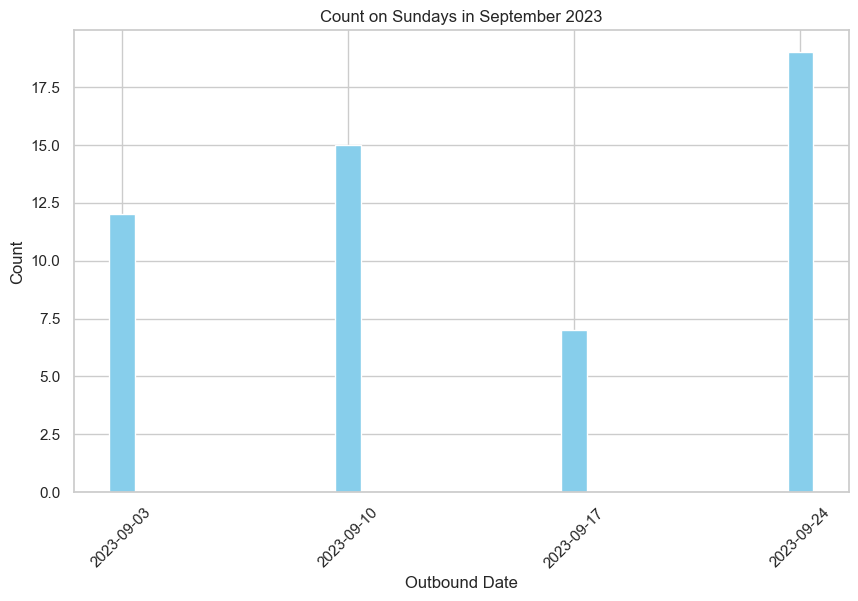

In [400]:
spt['Outbound Date'] = pd.to_datetime(spt['Outbound Date'], format='%Y-%m-%d')

# Filter data for Sundays
sundays_data = spt[spt['Outbound Day'] == 'Sunday']

# Create the plot
# sundays_data = spt[spt['Outbound Day'] == 'Sunday']

# Create a list of Sunday dates
sunday_dates = sundays_data['Outbound Date'].tolist()

# Create a list of count values
count_values = sundays_data['count'].tolist()

sunday_dates = sundays_data['Outbound Date'].tolist()

# Create a list of count values
count_values = sundays_data['count'].tolist()

# Create the plot
plt.figure(figsize=(10,6))
plt.bar(sunday_dates, count_values, color='skyblue')
plt.title('Count on Sundays in September 2023')
plt.xlabel('Outbound Date')
plt.ylabel('Count')
plt.xticks(sunday_dates, rotation=45)

# Get the x-axis tick labels
x_tick_labels = plt.gca().get_xticklabels()

# Set the visible parameter of the x-axis tick labels to False
for x_tick_label in x_tick_labels:
    x_tick_label.set_visible(False)

# Only show the x-axis tick labels for the Sunday dates
for i, sunday_date in enumerate(sunday_dates):
    x_tick_labels[i].set_visible(True)

# Show the plot
plt.show()

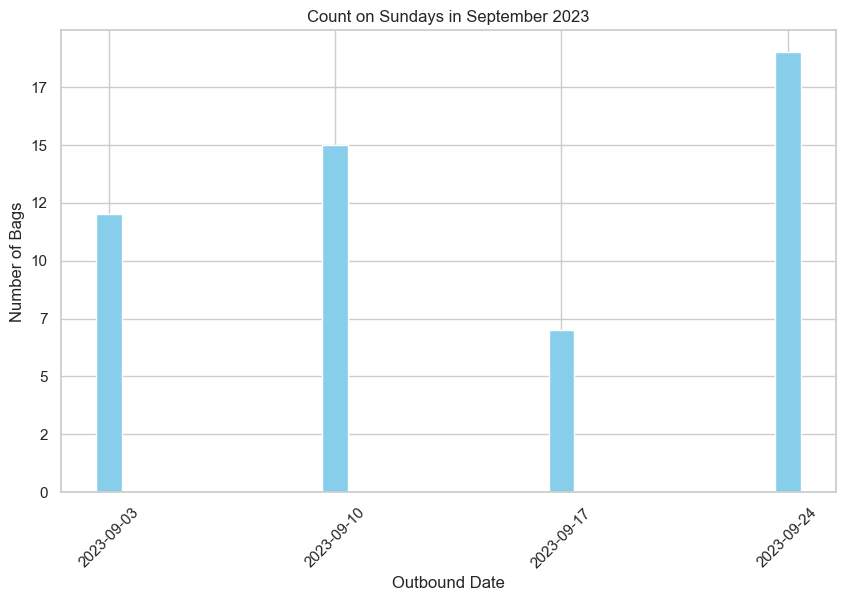

In [408]:
# Create the plot
def int_formatter(x, pos):
    return '%d' % x
spt['Outbound Date'] = pd.to_datetime(spt['Outbound Date'], format='%Y-%m-%d')

# Filter data for Sundays
sundays_data = spt[spt['Outbound Day'] == 'Sunday']

# Create the plot
# sundays_data = spt[spt['Outbound Day'] == 'Sunday']

# Create a list of Sunday dates
sunday_dates = sundays_data['Outbound Date'].tolist()

# Create a list of count values
count_values = sundays_data['count'].tolist()

sunday_dates = sundays_data['Outbound Date'].tolist()
plt.figure(figsize=(10,6))
plt.bar(sunday_dates, count_values, color='skyblue')
plt.title('Count on Sundays in September 2023')
plt.xlabel('Outbound Date')
plt.ylabel('Number of Bags')
plt.xticks(sunday_dates, rotation=45)

# Get the y-axis tick labels
# Set the y-axis formatter to the custom formatter
plt.gca().yaxis.set_major_formatter(int_formatter)# Set the y-axis formatter to the custom formatter
plt.show()


# # Set the text of the y-axis tick labels to the count values
# for i, count_value in enumerate(count_values):
#     y_tick_labels[i].set_text(str(count_value))

# # Show the plot
# plt.show()

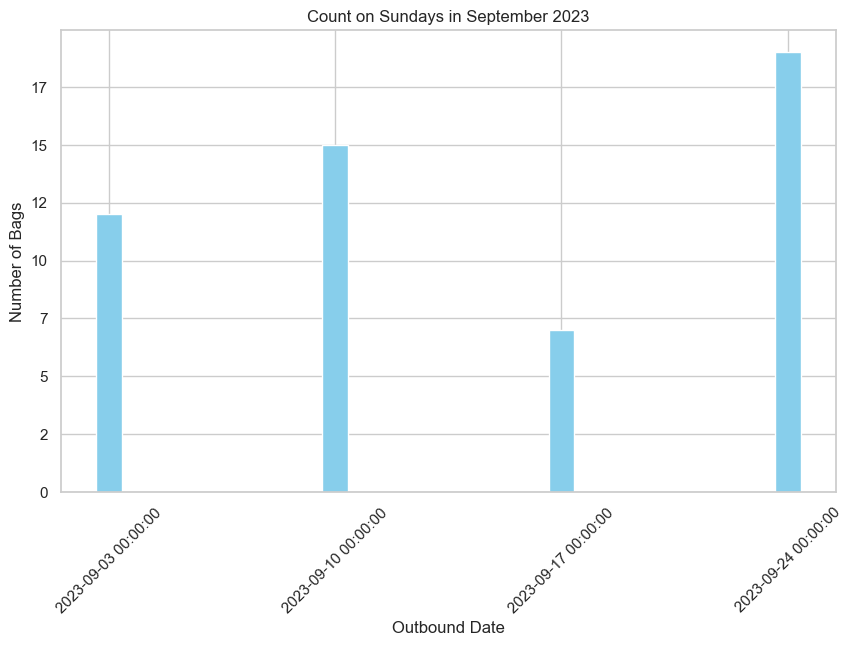

In [407]:
# Create a list of Sunday dates
sunday_dates = sundays_data['Outbound Date'].tolist()

# Create a list of count values
count_values = sundays_data['count'].tolist()

# Create the plot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(sunday_dates, count_values, color='skyblue')
ax.set_title('Count on Sundays in September 2023')
ax.set_xlabel('Outbound Date')
ax.set_ylabel('Number of Bags')

# Set the y-axis formatter to the custom formatter
ax.yaxis.set_major_formatter(int_formatter)

# Iterate over the bars and add text to the top of each bar
for bar, count in zip(ax.containers[0], count_values):
    xy = bar.xy[1] + bar.get_width()/2, 1
    ax.annotate(str(count), xy, ha='center', va='bottom', color='white', fontsize=12)

# Set the x-axis ticks
ax.set_xticks(sunday_dates)
# Rotate the x-axis ticks by 45 degrees
ax.set_xticklabels(sunday_dates, rotation=45)

# Show the plot
plt.show()

In [367]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a Pandas DataFrame
# count_of_missedBags = pd.DataFrame({'Outbound Date': ['2023-09-22', '2023-09-23', '2023-09-24', '2023-09-25', '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29', '2023-09-30'], 'count': [22, 23, 19, 17, 16, 15, 15, 15, 15], 'Outbound Day': ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']})

# get the data of all the Sundays:
sunday_bags = count_of_missedBags[count_of_missedBags['Outbound Day'] == 'Sunday']


sunday_bags = count_of_missedBags[count_of_missedBags['Outbound Day'] == 'Sunday']
sunday_bags.head()
# sunday_bags = sunday_bags.sort_values(by=['Outbound Date'])

# # Get the unique Sunday dates
# sunday_dates = sunday_bags['Outbound Date'].unique()

# # Create a bar chart of the count for each Sunday date
# plt.bar(sunday_dates, sunday_bags['count'])
# plt.xlabel('Outbound Date')
# plt.ylabel('Count')
# plt.title('Count of Missed Bags on Sundays in September 2023')
# plt.show()


# # Create a bar chart of the count, colored by outbound day
# plt.bar(count_of_missedBags['Outbound Date'], count_of_missedBags['count'], color=[day_colors[day] for day in count_of_missedBags['Outbound Day']])
# plt.xlabel('Outbound Date')
# plt.ylabel('Count')
# plt.title('Count by Outbound Date and Outbound Day in September 2023')
# plt.show()

,Outbound Date,count,Outbound Day
2,2023-09-24,19,Sunday


In [339]:
merged_data.head()

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,...,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident,SIN-Index,C,Outbound FNO,Date,Outbound Date,Connection Time,Outbound Day
1,PVGSQ32480,LAI,1 / SQ / 233139,"['PER', 'SIN', 'PVG']","['SQ214/31Aug2023', 'SQ826/01Sep2023']",STA 2235 X ATA 0017 X STD 0115 X TX02ATR@0049 ...,SS,55.0,Connecting Time #1 [SIN] : 0 hr 58 mins from t...,1.0,...,BatchProcess System,SIN,1g. Transfer SQ-SQ,1,"['SQ826', '01Sep2023']",SQ826,1-Sep-23,2023-09-01,60,5
2,PNHSQ14769,LIYANGE,1 / SQ / 256860,"['SIN', 'PNH']",['SQ154/01Sep2023'],STD 0740 X CT70A290@0546 X RT12@0547 X FWDD BY...,LOADING ERROR,21.0,NaN,1.0,...,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ154', '01Sep2023']",SQ154,1-Sep-23,2023-09-01,54,5
3,BKKSQ39975,YU,1 / SQ / 282769,"['SIN', 'BKK']",['SQ714/01Sep2023'],STD 1730 X CT70A290@1550,NO AUTHORITY/BUM X BSM RECEIVED@1634 BUT NOT S...,21.0,NaN,1.0,...,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ714', '01Sep2023']",SQ714,1-Sep-23,2023-09-01,48,5
5,PERSQ14474,PINTO,1 / AF / 337842,"['CDG', 'SIN', 'PER']","['AF256/31Aug2023', 'SQ223/01Sep2023']",STD 0930 X REBOOKED FROM QF72/31AUG,SS X NOT RETAGGED,56.0,Call Status AF256: There's an error while retr...,1.0,...,BatchProcess System,SIN,1e. Transfer MCT,1,"['SQ223', '01Sep2023']",SQ223,1-Sep-23,2023-09-01,-1264,5
6,CGKSQ48702,WANG,1 / SQ / 226861,"['MLE', 'SIN', 'CGK']","['SQ431/31Aug2023', 'SQ950/01Sep2023']",STA 2100 X ATA 2210 X STD 0620 X TX01ATR@2237 ...,SS X NOT RETAGGED,55.0,Connecting Time #1 [SIN] : 8 hr 10 mins from t...,1.0,...,BatchProcess System,SIN,1g. Transfer SQ-SQ,1,"['SQ950', '01Sep2023']",SQ950,1-Sep-23,2023-09-01,80,5


In [341]:
# Assuming 'merged_data' is your DataFrame

# Define a dictionary to map the days
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

# Map 'Outbound Day' to the corresponding day names
merged_data['Outbound Day'] = merged_data['Outbound Day'].map(day_map)


In [358]:
merged_data.columns

Index(['Rec Type PIR', 'WT Last Name', 'Tag Number', 'Routing (RT)',
       'Passenger Itinerary (FD)', 'Reason of Rejection',
       'Worldtracer Fault Station', 'RL Code', 'Actual Connecting Time',
       'Demerit Points', 'Status', 'WTR CREATE DATE FORMAT',
       'Name Last Modified', 'BCMT Fault Station: BCMT Station Name',
       'Incident', 'SIN-Index', 'C', 'Outbound FNO', 'Date', 'Outbound Date',
       'Connection Time', 'Outbound Day'],
      dtype='object')

In [343]:
merged_data.tail()

,Rec Type PIR,WT Last Name,Tag Number,Routing (RT),Passenger Itinerary (FD),Reason of Rejection,Worldtracer Fault Station,RL Code,Actual Connecting Time,Demerit Points,...,Name Last Modified,BCMT Fault Station: BCMT Station Name,Incident,SIN-Index,C,Outbound FNO,Date,Outbound Date,Connection Time,Outbound Day
533,MELSQ14196,KARTSIDIMA,T1 / TK / 762097 2 / TK / 761929 3 / TK / 761833,"['SKG', 'IST', 'SIN', 'MEL']","['TK1894/28Sep2023', 'TK54/29Sep2023', 'SQ237/...",NaN,OAL,12.0,Call Status TK1894: There's an error while ret...,1.0,...,BatchProcess System,SIN,1a. Tagging Error,2,"['SQ237', '30Sep2023']",SQ237,30-Sep-23,2023-09-30,52,Saturday
536,PVGSQ10280,NG,T1 / SQ / 166807,"['SIN', 'PVG']",['SQ830/30Sep2023'],930,SHORTSHIPPED,21.0,NaN,1.0,...,BatchProcess System,SIN,1b. Failed to Join Loading,0,"['SQ830', '30Sep2023']",SQ830,30-Sep-23,2023-09-30,44,Saturday
537,NRTSQ19128,SHIMODA,T1 / SQ / 193928,"['KNO', 'SIN', 'NRT']","['SQ995/30Sep2023', 'SQ638/30Sep2023']",2242/2355,SURFBOARD S/S,55.0,Connecting Time #1 [SIN] : 1 hr 14 mins from t...,1.0,...,BatchProcess System,SIN,1g. Transfer SQ-SQ,1,"['SQ638', '30Sep2023']",SQ638,30-Sep-23,2023-09-30,76,Saturday
538,HKTSQ15571,BENTOE,T1 / SQ / 135023,"['CPH', 'SIN', 'HKT']","['SQ351/29Sep2023', 'SQ726/30Sep2023']",NaN,SHORTSHIPPED,55.0,Connecting Time #1 [SIN] : 1 hr 28 mins from t...,1.0,...,BatchProcess System,SIN,1g. Transfer SQ-SQ,1,"['SQ726', '30Sep2023']",SQ726,30-Sep-23,2023-09-30,71,Saturday
539,DPSSQ22158,SINGH,T1 / SQ / 173007,"['BOM', 'SIN', 'DPS']","['SQ421/30Sep2023', 'SQ948/30Sep2023']",2018/2120,SHORTSHIPPED,55.0,Connecting Time #1 [SIN] : 1 hr 2 mins from te...,1.0,...,BatchProcess System,SIN,1g. Transfer SQ-SQ,1,"['SQ948', '30Sep2023']",SQ948,30-Sep-23,2023-09-30,42,Saturday


<Axes: xlabel='Outbound Date'>

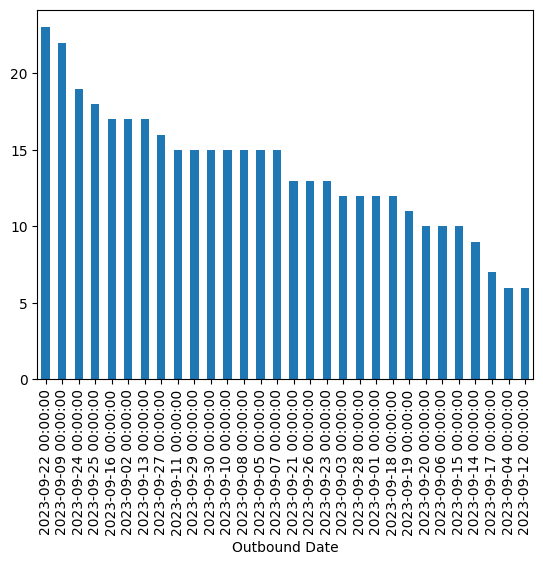

In [344]:
# draw graph of merged_data['Outbound Date'].value_counts():
merged_data['Outbound Date'].value_counts().plot(kind='bar')

AttributeError: 'Axes' object has no attribute 'xticks'

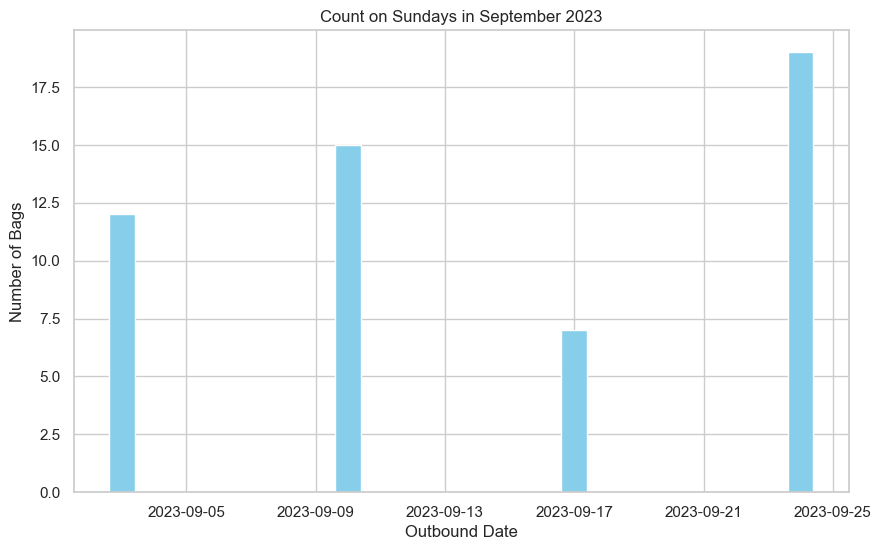

In [409]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_daily_bag_count(day_name, spt):

  """Plots the number of bags on the given day, with the x-axis tick labels rotated by 45 degrees, using the data from the given Pandas DataFrame.

  Args:
    day_name: The name of the day to plot.
    spt: The Pandas DataFrame containing the data.
  """

  # Filter data for the given day
  day_data = spt[spt['Outbound Day'] == day_name]

  # Create a list of dates
  dates = day_data['Outbound Date'].tolist()

  # Create a list of count values
  count_values = day_data['count'].tolist()

  # Create the plot
  fig, ax = plt.subplots(figsize=(10,6))
  ax.bar(dates, count_values, color='skyblue')
  ax.set_title('Count on {}s in September 2023'.format(day_name))
  ax.set_xlabel('Outbound Date')
  ax.set_ylabel('Number of Bags')
  ax.xticks(dates, rotation=45)

  # Set the y-axis formatter to the custom formatter
  ax.yaxis.set_major_formatter(int_formatter)

  # Show the plot
  plt.show()


# Call the function with the day name as input and the spt DataFrame as the second argument
plot_daily_bag_count('Sunday', spt)

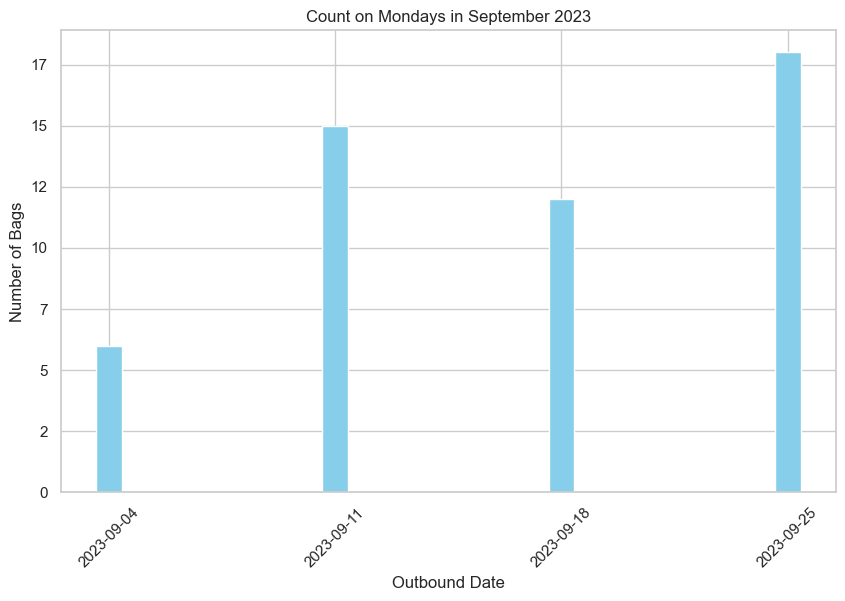

In [411]:
import matplotlib.pyplot as plt

# Create a function to plot data for a specific day
def plot_day_data(day, data):
    # Filter data for the specified day
    specific_day_data = data[data['Outbound Day'] == day]

    # Create the plot
    sunday_dates = specific_day_data['Outbound Date'].tolist()
    count_values = specific_day_data['count'].tolist()
    
    # Define a custom formatter for the y-axis
    def int_formatter(x, pos):
        return '%d' % x

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(sunday_dates, count_values, color='skyblue')
    plt.title(f'Count on {day}s in September 2023')
    plt.xlabel('Outbound Date')
    plt.ylabel('Number of Bags')
    plt.xticks(sunday_dates, rotation=45)
    plt.gca().yaxis.set_major_formatter(int_formatter)  # Set the y-axis formatter to the custom formatter
    plt.show()

# Assuming 'spt' is your DataFrame
spt['Outbound Date'] = pd.to_datetime(spt['Outbound Date'], format='%Y-%m-%d')
# Specify the day for plotting
plot_day_data('Monday', spt)  # Provide the day as an argument to the function


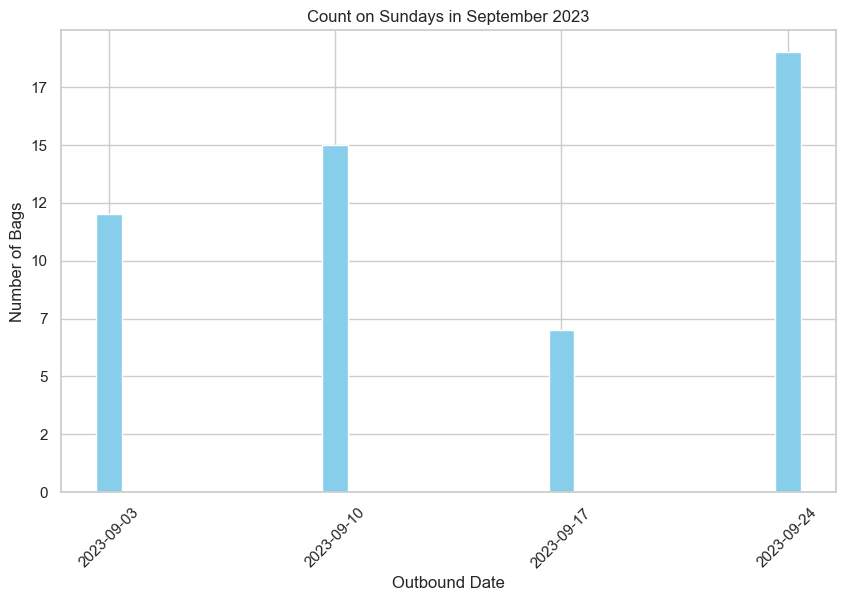

In [412]:
import matplotlib.pyplot as plt

# Create a function to plot data for a specific day
def plot_day_data(day, data):
    # Filter data for the specified day
    specific_day_data = data[data['Outbound Day'] == day]

    # Create the plot
    sunday_dates = specific_day_data['Outbound Date'].tolist()
    count_values = specific_day_data['count'].tolist()
    
    # Define a custom formatter for the y-axis
    def int_formatter(x, pos):
        return '%d' % x

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(sunday_dates, count_values, color='skyblue')
    plt.title(f'Count on {day}s in September 2023')
    plt.xlabel('Outbound Date')
    plt.ylabel('Number of Bags')
    plt.xticks(sunday_dates, rotation=45)
    plt.gca().yaxis.set_major_formatter(int_formatter)  # Set the y-axis formatter to the custom formatter
    plt.show()

# Assuming 'spt' is your DataFrame
spt['Outbound Date'] = pd.to_datetime(spt['Outbound Date'], format='%Y-%m-%d')
# Specify the day for plotting
plot_day_data('Sunday', spt)  # Provide the day as an argument to the function


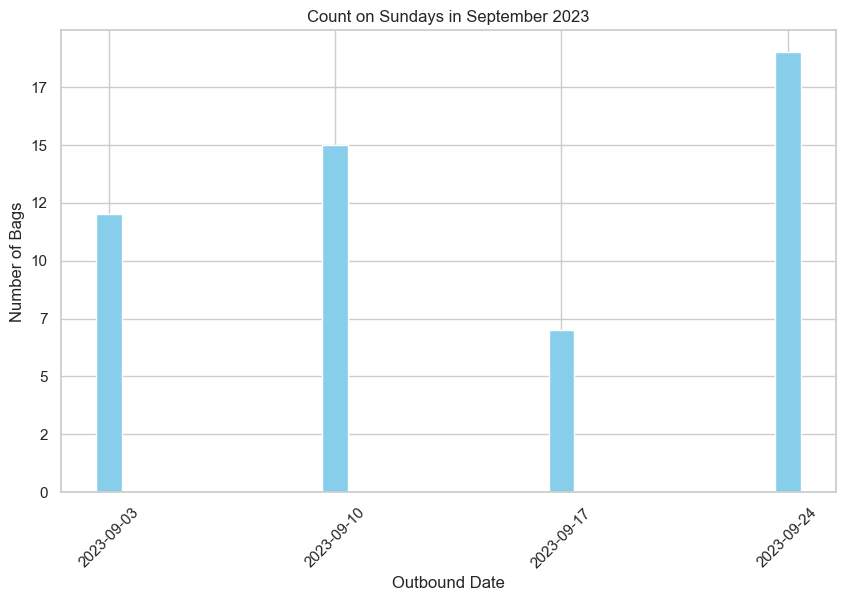

In [413]:
plot_day_data('Sunday', spt)  # Provide the day as an argument to the function

In [495]:
import matplotlib.pyplot as plt

# Create a function to plot data for a specific day
def plot_day_data(day, data):
    # Filter data for the specified day
    specific_day_data = data[data['Outbound Day'] == day]

    # Create the plot
    sunday_dates = specific_day_data['Outbound Date'].tolist()
    count_values = specific_day_data['total_bags'].tolist()

    # Define a custom formatter for the y-axis
    def int_formatter(x, pos):
        return '%d' % x

    # Define colors for each day of the week
    colors = {'Monday': 'red', 'Tuesday': 'blue', 'Wednesday': 'green', 'Thursday': 'orange', 'Friday': 'purple', 'Saturday': 'brown', 'Sunday': 'skyblue'}
    color = colors[day]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(sunday_dates, count_values, color=color)
    plt.title(f'Count of {day}s missed Bags in September 2023')
    plt.xlabel('Outbound Date')
    plt.ylabel('Number of Bags')
    plt.xticks(sunday_dates, rotation=45)
    plt.gca().yaxis.set_major_formatter(int_formatter)  # Set the y-axis formatter to the custom formatter
    plt.show()

# Assuming 'spt' is your DataFrame
spt['Outbound Date'] = pd.to_datetime(spt['Outbound Date'], format='%Y-%m-%d')
  # Provide the day as an argument to the function


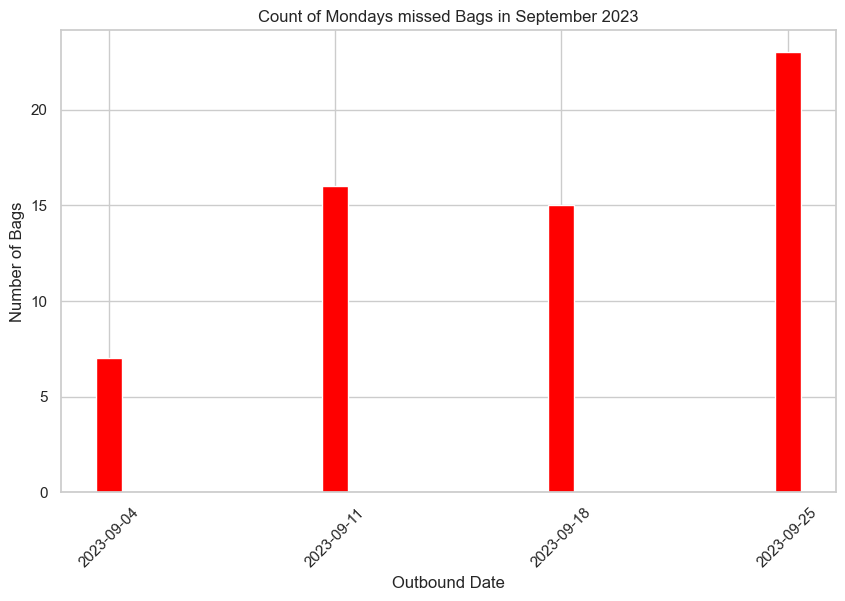

In [496]:
# Specify the day for plotting
plot_day_data('Monday', spt)

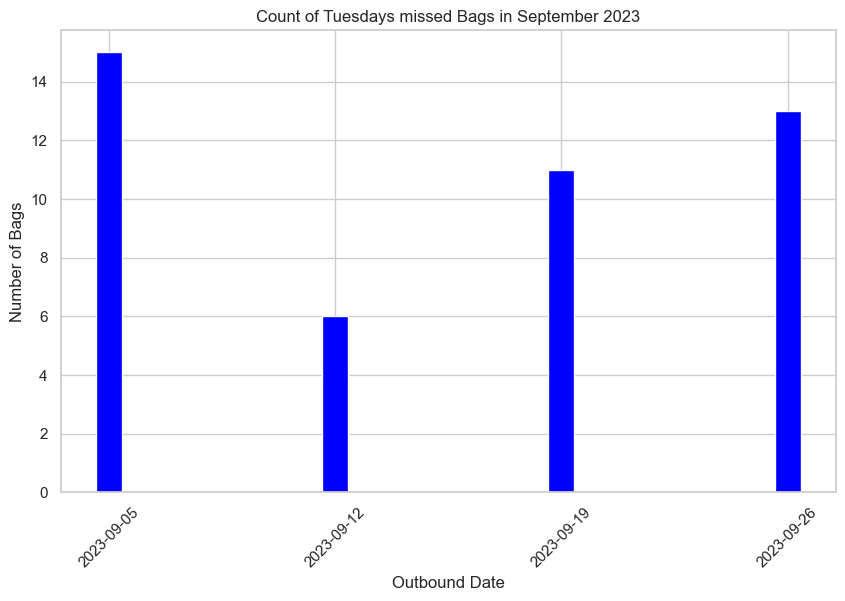

In [428]:
plot_day_data('Tuesday', spt)

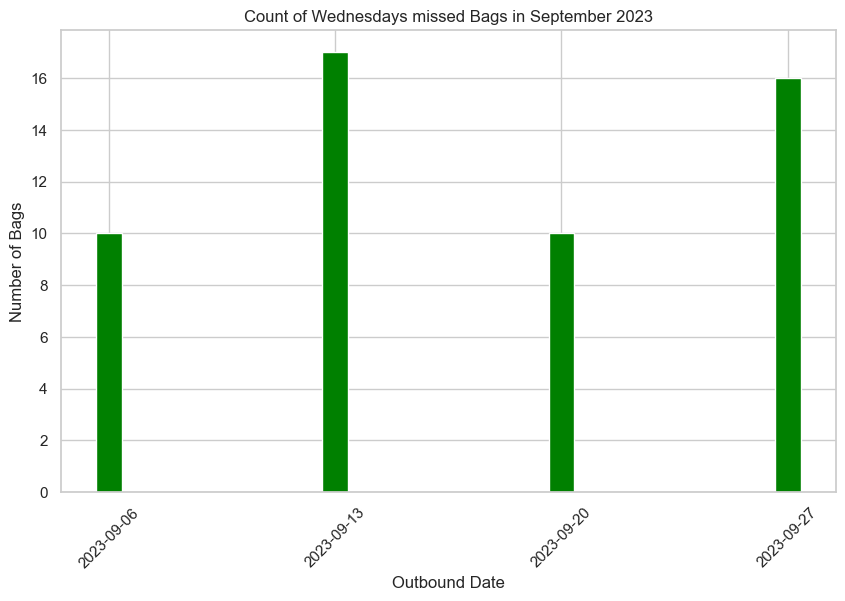

In [429]:
plot_day_data('Wednesday', spt)

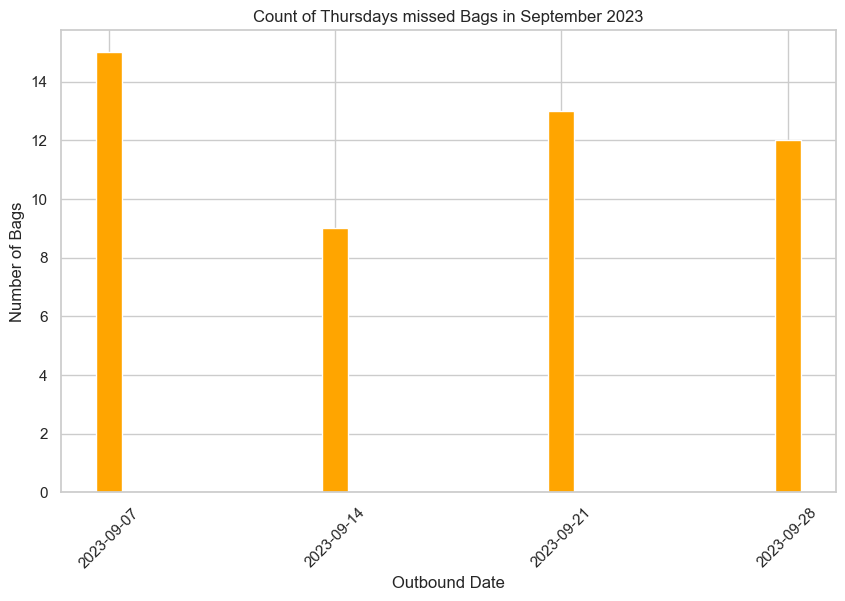

In [430]:
plot_day_data('Thursday', spt)

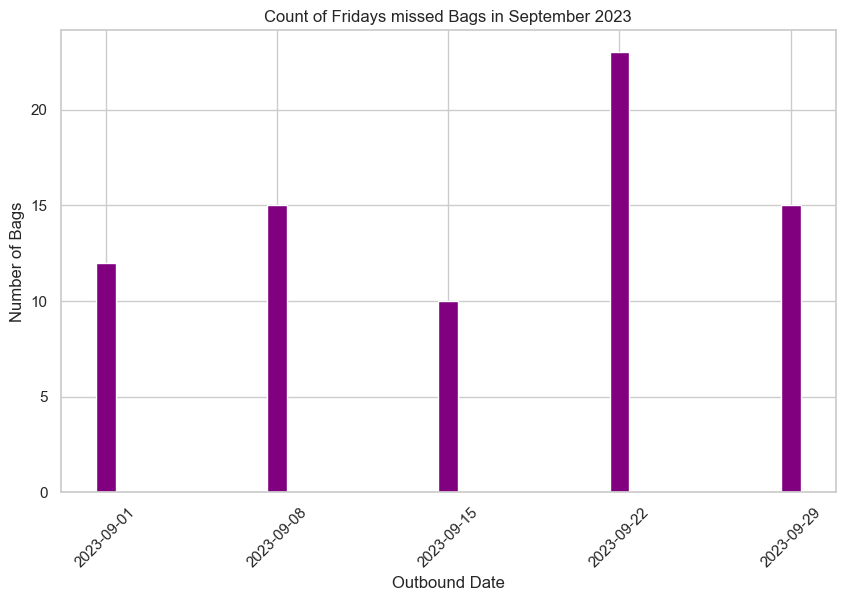

In [431]:
plot_day_data('Friday', spt)

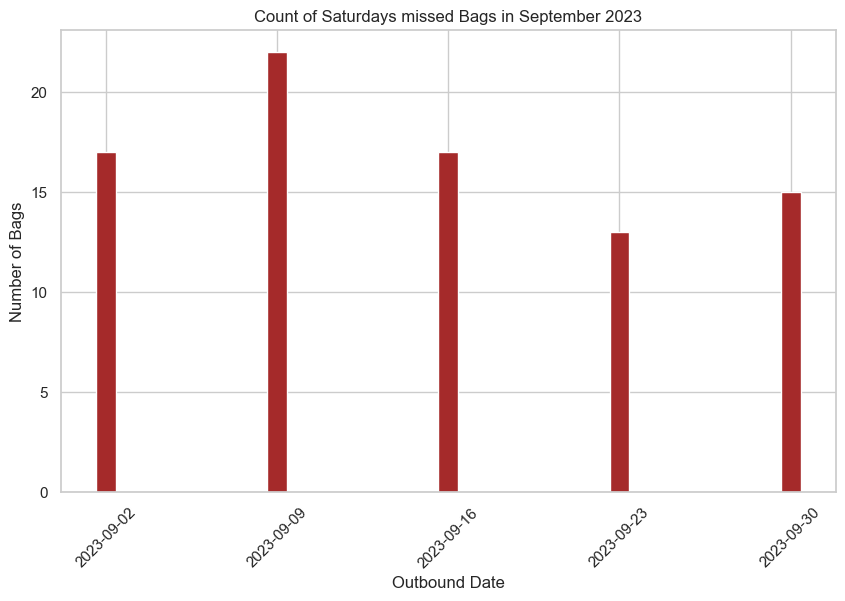

In [432]:
plot_day_data('Saturday', spt)

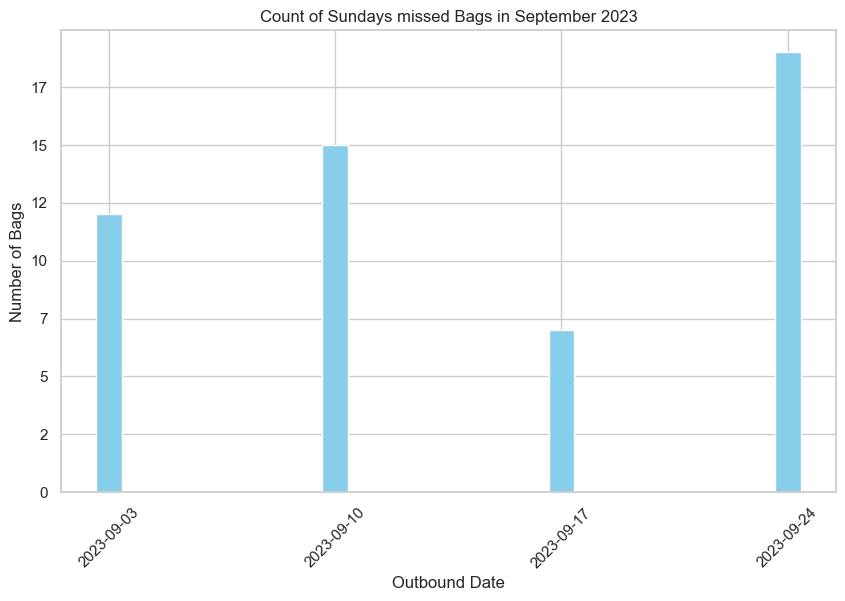

In [433]:
plot_day_data('Sunday', spt)

In [497]:
import matplotlib.pyplot as plt

# Create a function to plot data for a specific day
def plot_day_data(day, data):
    # Filter data for the specified day
    specific_day_data = data[data['Outbound Day'] == day]

    # Create the plot
    sunday_dates = specific_day_data['Outbound Date'].tolist()
    count_values = specific_day_data['total_bags'].tolist()

    # Define a custom formatter for the y-axis
    def int_formatter(x, pos):
        return '%d' % x

    # Define colors for each day of the week
    colors = {'Monday': 'red', 'Tuesday': 'blue', 'Wednesday': 'green', 'Thursday': 'orange', 'Friday': 'purple', 'Saturday': 'brown', 'Sunday': 'skyblue'}
    color = colors[day]

    # Create the plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(sunday_dates, count_values, color=color)
    plt.title(f'Count of {day}s missed Bags in September 2023')
    plt.xlabel('Outbound Date')
    plt.ylabel('Number of Bags')
    plt.xticks(sunday_dates, rotation=45)
    plt.gca().yaxis.set_major_formatter(int_formatter)  # Set the y-axis formatter to the custom formatter

    # Display count values on top of each bar
    for bar, count in zip(bars, count_values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

    plt.show()

# Assuming 'spt' is your DataFrame
spt['Outbound Date'] = pd.to_datetime(spt['Outbound Date'], format='%Y-%m-%d')
# Specify the day for plotting
  # Provide the day as an argument to the function


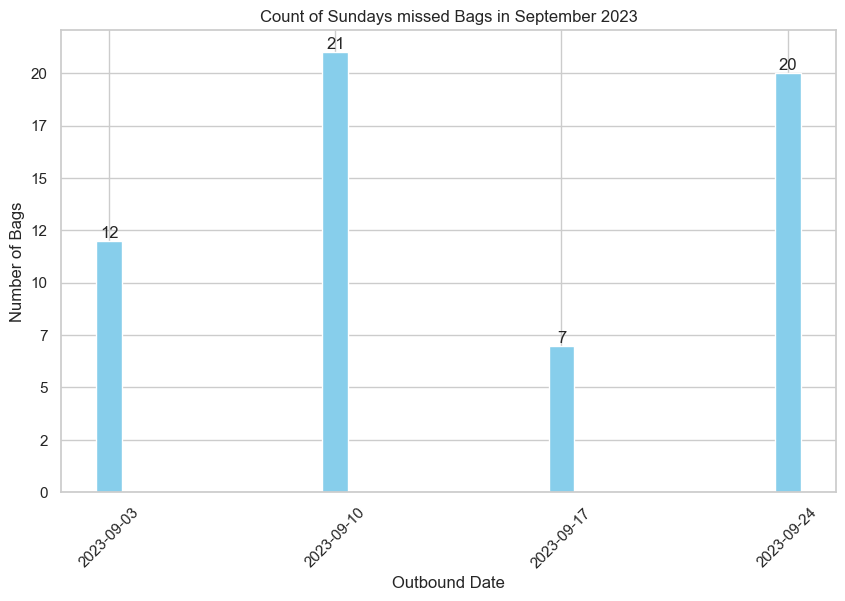

In [498]:

plot_day_data('Sunday', spt)  # Provide the day as an argument to the function

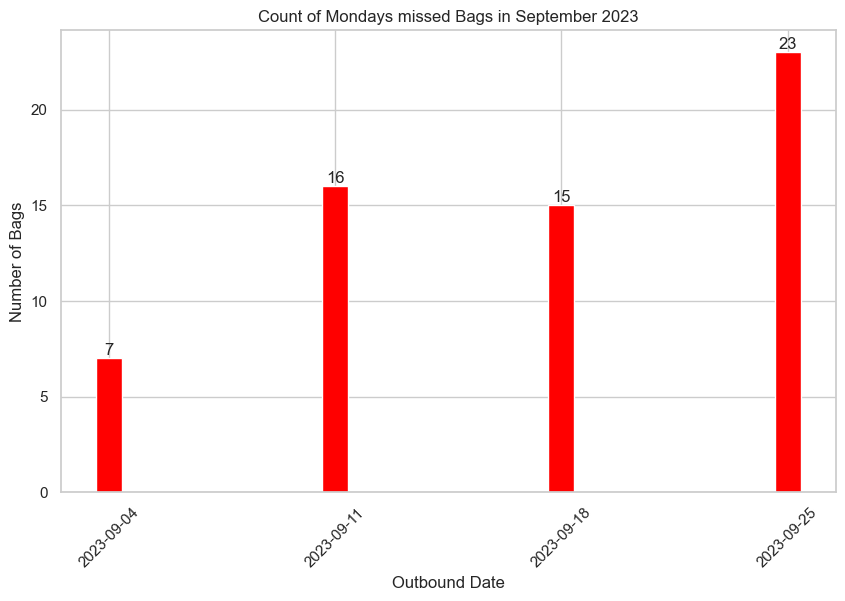

In [499]:
plot_day_data('Monday', spt)  # Provide the day as an argument to the function

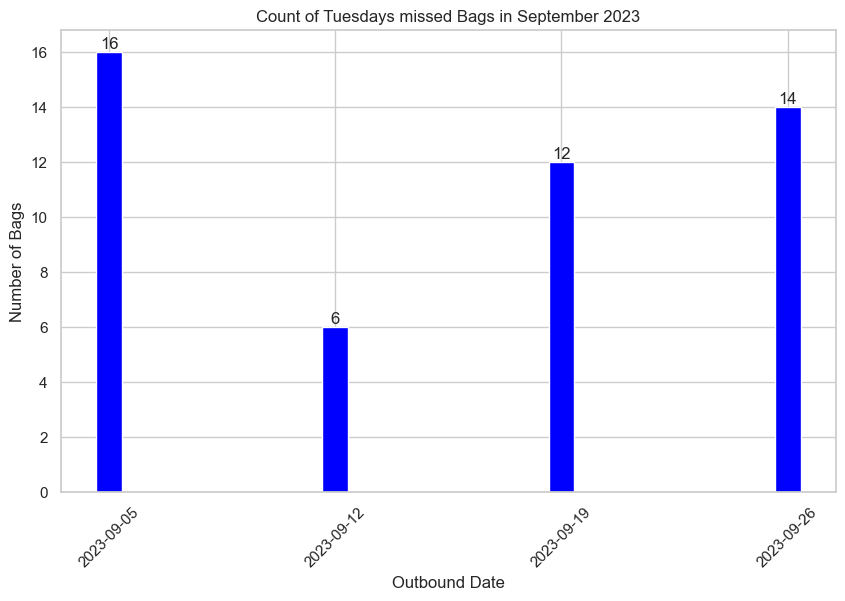

In [500]:
plot_day_data('Tuesday', spt)  # Provide the day as an argument to the function

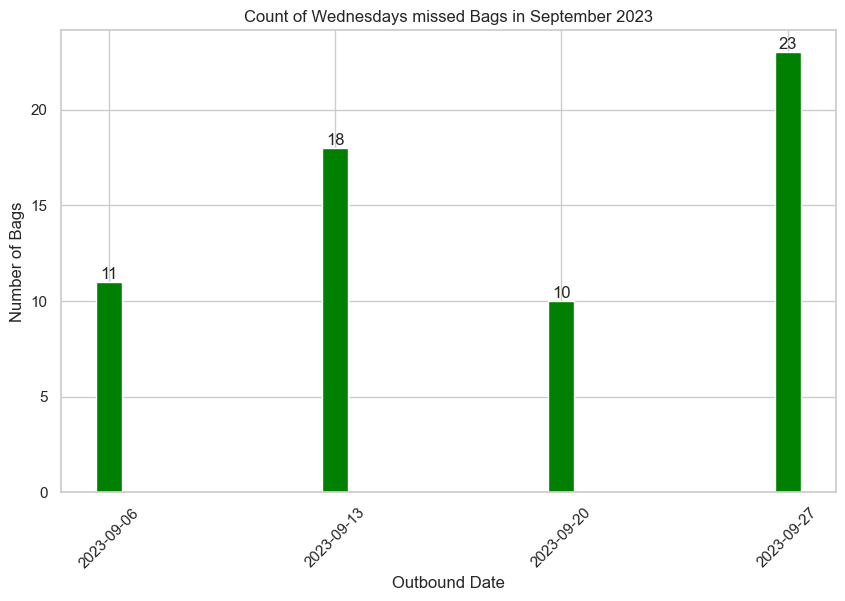

In [501]:
plot_day_data('Wednesday', spt)  # Provide the day as an argument to the function

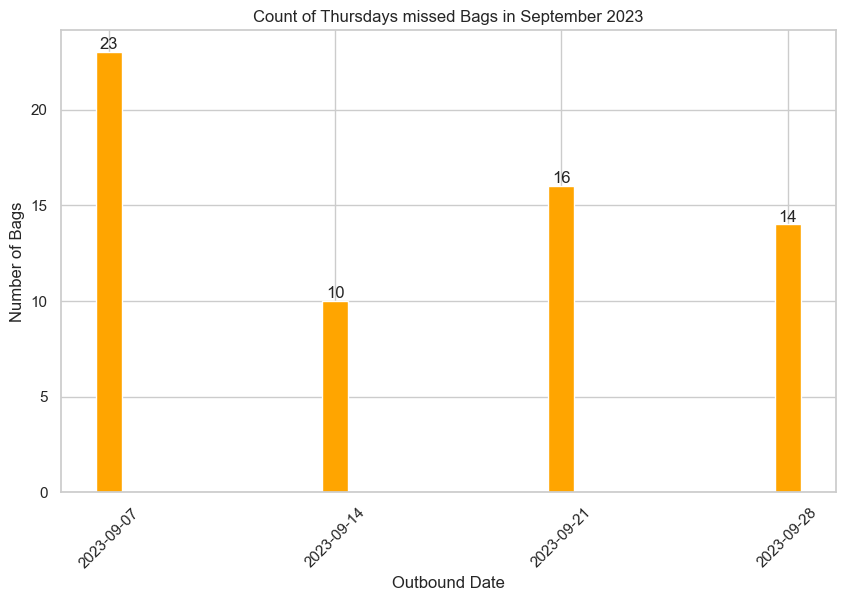

In [502]:
plot_day_data('Thursday', spt)  # Provide the day as an argument to the function

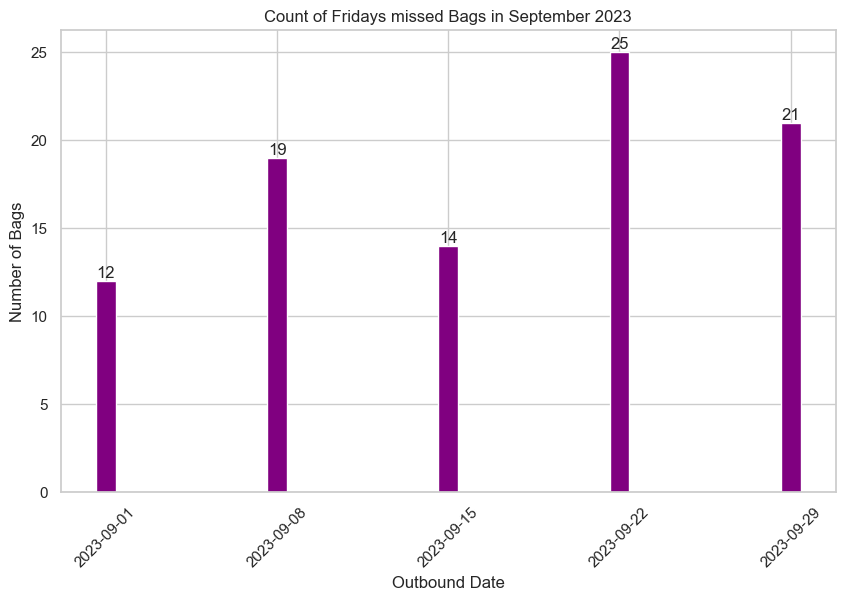

In [503]:
plot_day_data('Friday', spt)  # Provide the day as an argument to the function

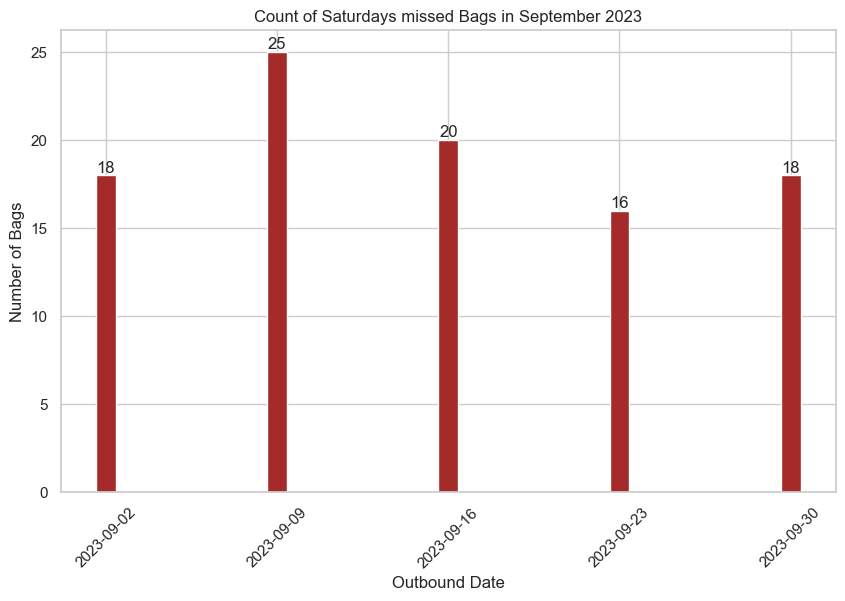

In [504]:
plot_day_data('Saturday', spt)  # Provide the day as an argument to the function

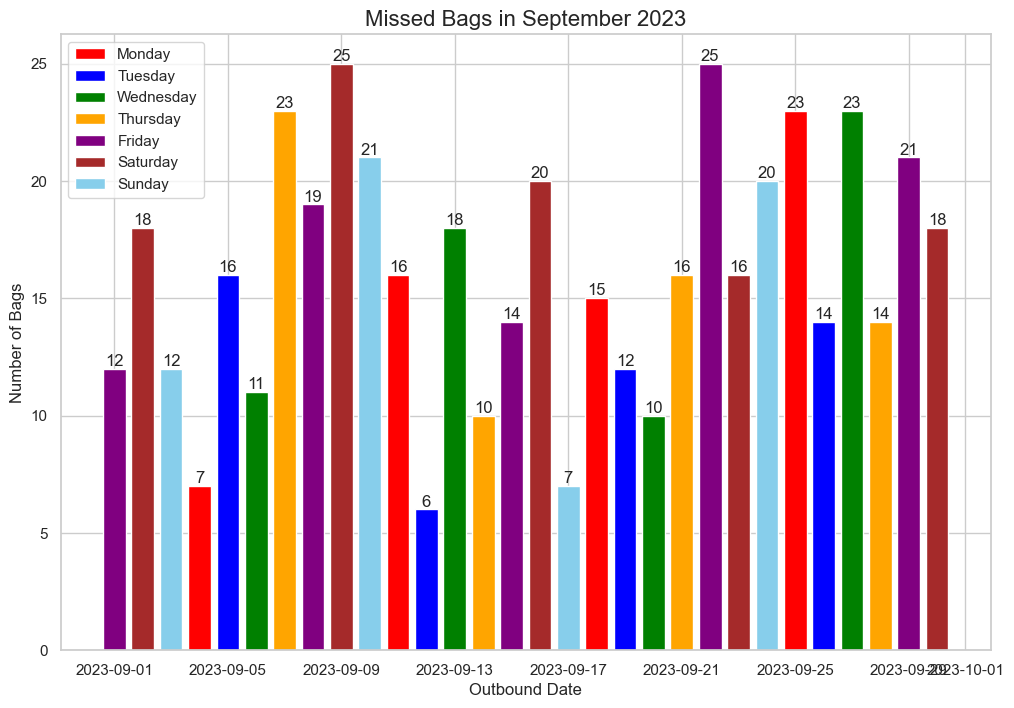

In [505]:
import matplotlib.pyplot as plt

# Create a function to plot data for a specific day
def plot_day_data(day, data, ax):
    # Filter data for the specified day
    specific_day_data = data[data['Outbound Day'] == day]

    # Create the plot
    sunday_dates = specific_day_data['Outbound Date'].tolist()
    count_values = specific_day_data['total_bags'].tolist()

    # Define colors for each day of the week
    colors = {'Monday': 'red', 'Tuesday': 'blue', 'Wednesday': 'green', 'Thursday': 'orange', 'Friday': 'purple', 'Saturday': 'brown', 'Sunday': 'skyblue'}
    color = colors[day]

    # Plot the data
    bars = ax.bar(sunday_dates, count_values, color=color, label=day)

    # Display count values on top of each bar
    for bar, count in zip(bars, count_values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Assuming 'spt' is your DataFrame
spt['Outbound Date'] = pd.to_datetime(spt['Outbound Date'], format='%Y-%m-%d')

# Create subplots for each day of the week
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through each day of the week and plot the data
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    plot_day_data(day, spt, ax)

# Set the title and labels
ax.set_title('Missed Bags in September 2023', fontsize=16)
ax.set_xlabel('Outbound Date', fontsize=12)
ax.set_ylabel('Number of Bags', fontsize=12)

# Display the legend
ax.legend()

# Show the plot
plt.show()


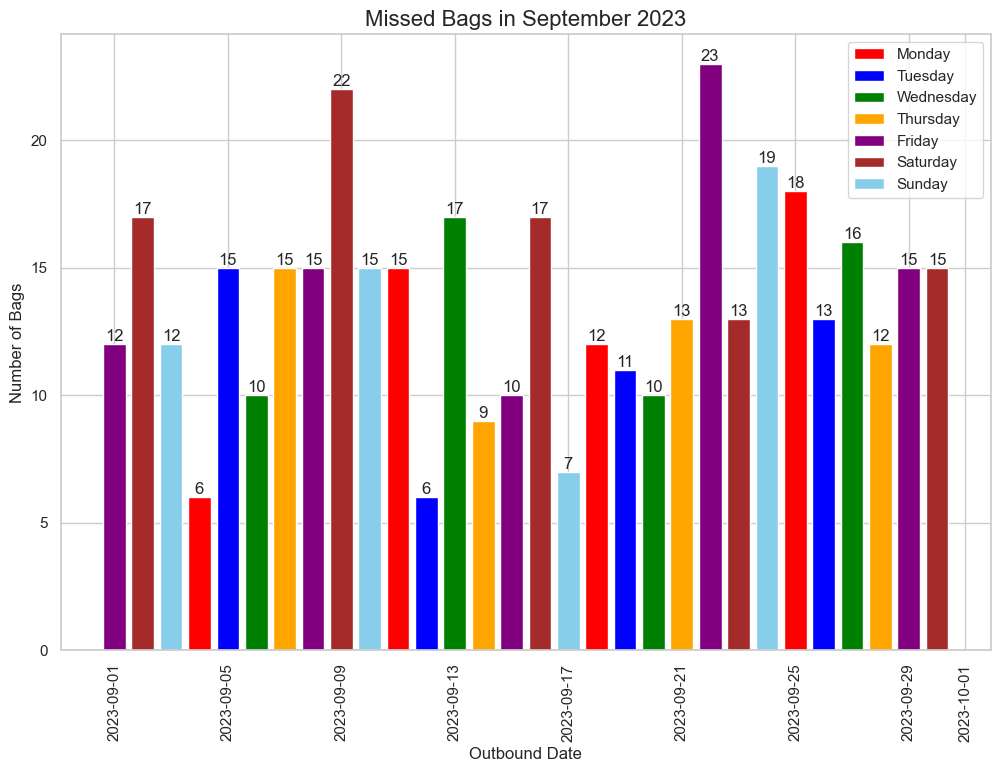

In [443]:
import matplotlib.pyplot as plt

# Create a function to plot data for a specific day
def plot_day_data(day, data, ax):
    # Filter data for the specified day
    specific_day_data = data[data['Outbound Day'] == day]

    # Create the plot
    sunday_dates = specific_day_data['Outbound Date'].tolist()
    count_values = specific_day_data['count'].tolist()

    # Define colors for each day of the week
    colors = {'Monday': 'red', 'Tuesday': 'blue', 'Wednesday': 'green', 'Thursday': 'orange', 'Friday': 'purple', 'Saturday': 'brown', 'Sunday': 'skyblue'}
    color = colors[day]

    # Plot the data
    bars = ax.bar(sunday_dates, count_values, color=color, label=day)

    # Display count values on top of each bar
    for bar, count in zip(bars, count_values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Assuming 'spt' is your DataFrame
spt['Outbound Date'] = pd.to_datetime(spt['Outbound Date'], format='%Y-%m-%d')

# Create subplots for each day of the week
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through each day of the week and plot the data
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    plot_day_data(day, spt, ax)

# Set the title and labels
ax.set_title('Missed Bags in September 2023', fontsize=16)
ax.set_xlabel('Outbound Date', fontsize=12)
ax.set_ylabel('Number of Bags', fontsize=12)

# Display the legend
ax.legend()

# Rotate the x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


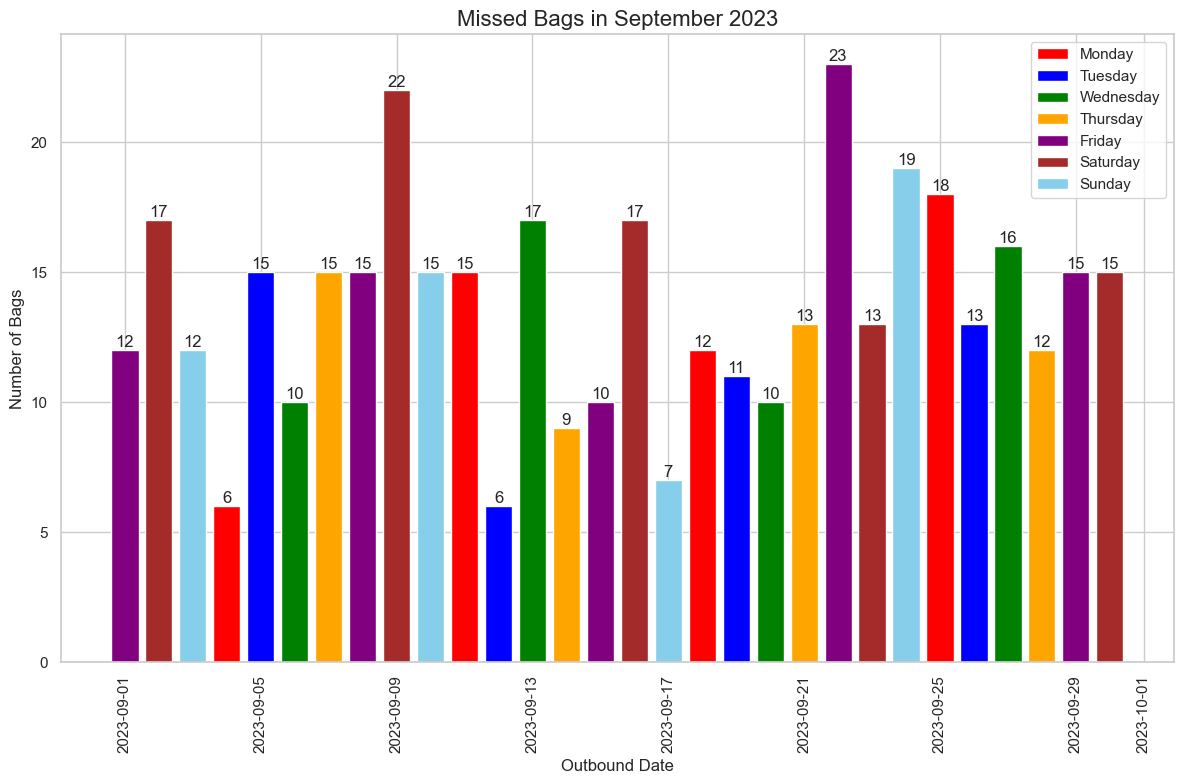

In [444]:
import matplotlib.pyplot as plt

# Create a function to plot data for a specific day
def plot_day_data(day, data, ax):
    # Filter data for the specified day
    specific_day_data = data[data['Outbound Day'] == day]

    # Create the plot
    sunday_dates = specific_day_data['Outbound Date'].tolist()
    count_values = specific_day_data['count'].tolist()

    # Define colors for each day of the week
    colors = {'Monday': 'red', 'Tuesday': 'blue', 'Wednesday': 'green', 'Thursday': 'orange', 'Friday': 'purple', 'Saturday': 'brown', 'Sunday': 'skyblue'}
    color = colors[day]

    # Plot the data
    bars = ax.bar(sunday_dates, count_values, color=color, label=day)

    # Display count values on top of each bar
    for bar, count in zip(bars, count_values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Assuming 'spt' is your DataFrame
spt['Outbound Date'] = pd.to_datetime(spt['Outbound Date'], format='%Y-%m-%d')

# Create subplots for each day of the week
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through each day of the week and plot the data
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    plot_day_data(day, spt, ax)

# Set the title and labels
ax.set_title('Missed Bags in September 2023', fontsize=16)
ax.set_xlabel('Outbound Date', fontsize=12)
ax.set_ylabel('Number of Bags', fontsize=12)

# Display the legend
ax.legend()

# Rotate the x-axis labels vertically
plt.xticks(rotation='vertical')

# Adjust the layout to ensure all dates are displayed
plt.tight_layout()

# Show the plot
plt.show()


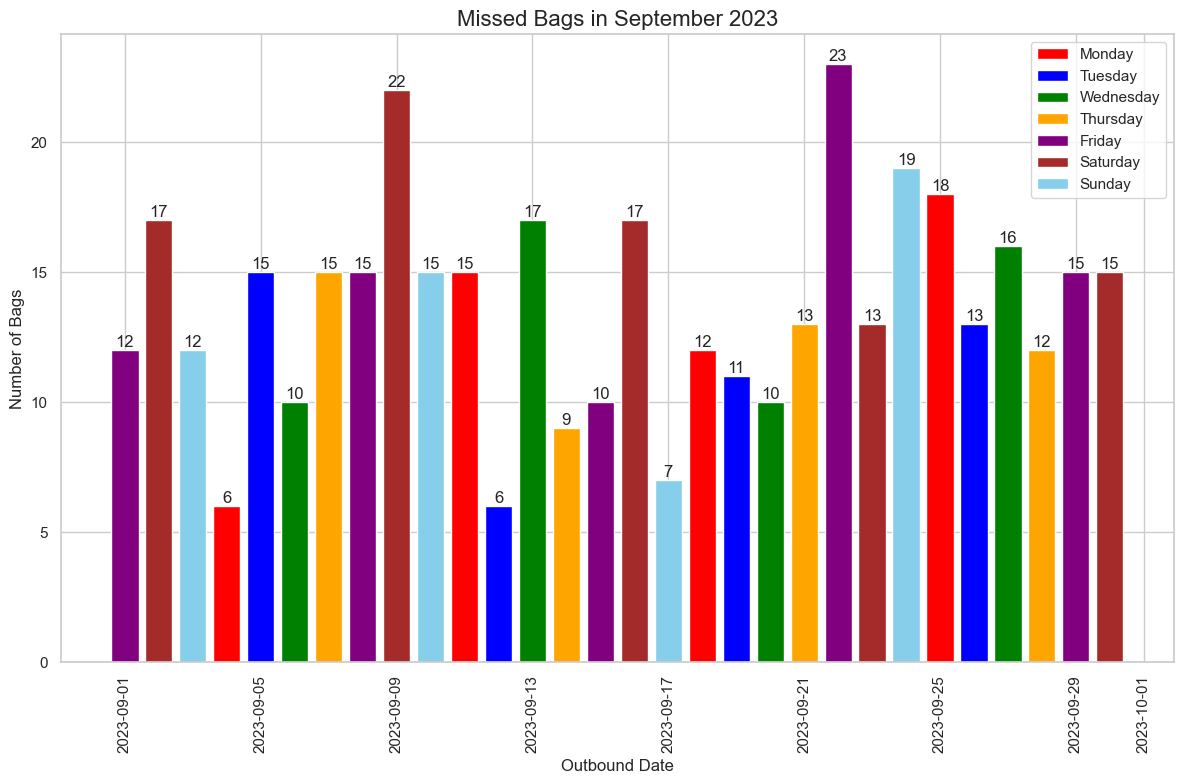

In [445]:
import matplotlib.pyplot as plt

# Create a function to plot data for a specific day
def plot_day_data(day, data, ax):
    # Filter data for the specified day
    specific_day_data = data[data['Outbound Day'] == day]

    # Create the plot
    sunday_dates = specific_day_data['Outbound Date'].tolist()
    count_values = specific_day_data['count'].tolist()

    # Define colors for each day of the week
    colors = {'Monday': 'red', 'Tuesday': 'blue', 'Wednesday': 'green', 'Thursday': 'orange', 'Friday': 'purple', 'Saturday': 'brown', 'Sunday': 'skyblue'}
    color = colors[day]

    # Plot the data
    bars = ax.bar(sunday_dates, count_values, color=color, label=day)

    # Display count values on top of each bar
    for bar, count in zip(bars, count_values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Assuming 'spt' is your DataFrame
spt['Outbound Date'] = pd.to_datetime(spt['Outbound Date'], format='%Y-%m-%d')

# Create subplots for each day of the week
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through each day of the week and plot the data
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    plot_day_data(day, spt, ax)

# Set the title and labels
ax.set_title('Missed Bags in September 2023', fontsize=16)
ax.set_xlabel('Outbound Date', fontsize=12)
ax.set_ylabel('Number of Bags', fontsize=12)

# Display the legend
ax.legend()

# Rotate the x-axis labels vertically
plt.xticks(rotation='vertical')

# Adjust the layout to ensure all dates are displayed
plt.tight_layout()

# Show the plot
plt.show()


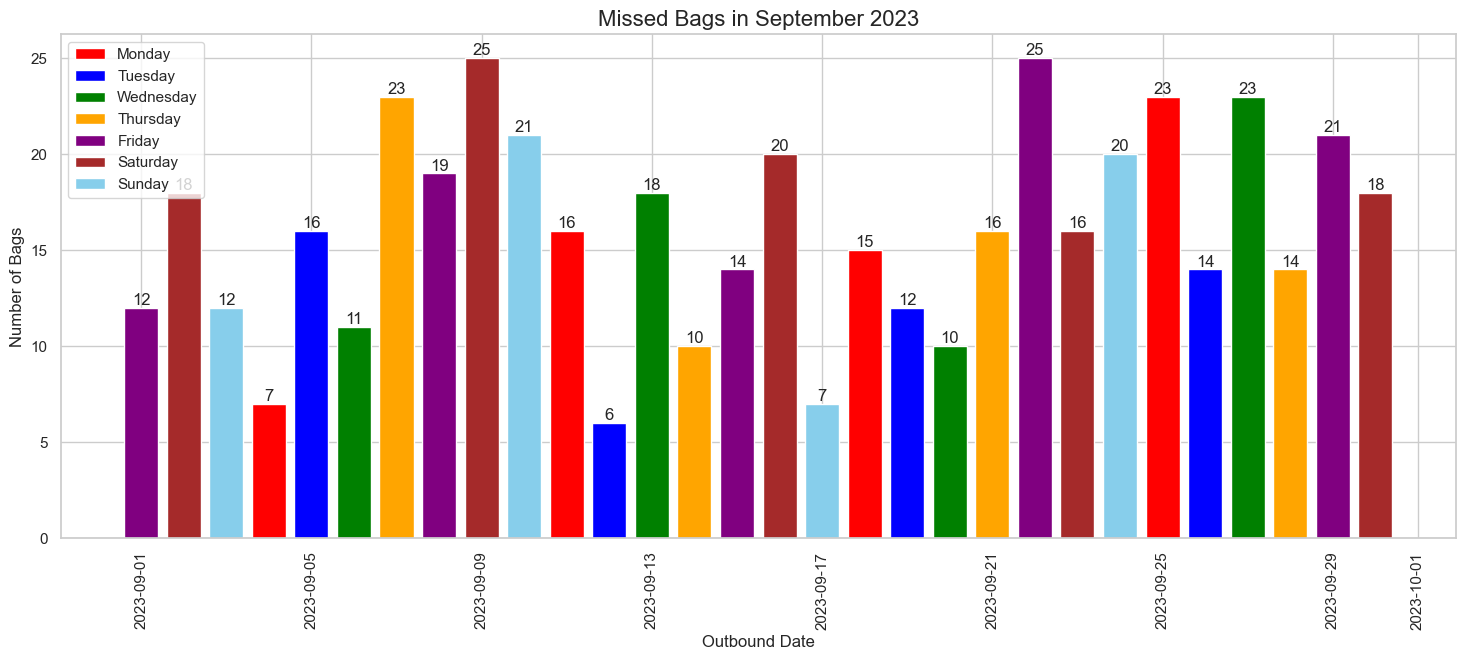

In [507]:
import matplotlib.pyplot as plt

# Create a function to plot data for a specific day
def plot_day_data(day, data, ax):
    # Filter data for the specified day
    specific_day_data = data[data['Outbound Day'] == day]

    # Create the plot
    sunday_dates = specific_day_data['Outbound Date'].tolist()
    count_values = specific_day_data['total_bags'].tolist()

    # Define colors for each day of the week
    colors = {'Monday': 'red', 'Tuesday': 'blue', 'Wednesday': 'green', 'Thursday': 'orange', 'Friday': 'purple', 'Saturday': 'brown', 'Sunday': 'skyblue'}
    color = colors[day]

    # Plot the data
    bars = ax.bar(sunday_dates, count_values, color=color, label=day)

    # Display count values on top of each bar
    for bar, count in zip(bars, count_values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Assuming 'spt' is your DataFrame
spt['Outbound Date'] = pd.to_datetime(spt['Outbound Date'], format='%Y-%m-%d')

# Create subplots for each day of the week
fig, ax = plt.subplots(figsize=(18, 8))

# Iterate through each day of the week and plot the data
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    plot_day_data(day, spt, ax)

# Set the title and labels
ax.set_title('Missed Bags in September 2023', fontsize=16)
ax.set_xlabel('Outbound Date', fontsize=12)
ax.set_ylabel('Number of Bags', fontsize=12)

# Display the legend
ax.legend()

# Rotate the x-axis labels vertically
plt.xticks(rotation='vertical')

# Adjust the layout to ensure all dates are displayed
plt.subplots_adjust(bottom=0.25)

# Show the plot
plt.show()


In [3]:
import shutil
# move the file to a new location:
shutil.move(r'G:\mlzoom_camp\2023\SATS-DA.ipynb', r'F:\Neural_Lab\SATS-1')

'F:\\Neural_Lab\\SATS-1\\SATS-DA.ipynb'